# Выявление профилей потребления покупателей магазина

<b>Описание проекта:</b> \
Владелец интернет-магазина товаров для дома и быта «Пока все ещё тут» хочет сформировать портреты покупателей на основе сохранившихся данных по истории заказов покупателей. \
А также необходимо ввести категоризацию товаров для дальнейшего более удобного отслеживания.\
Данные имеем за период с 1 октября 2018 года по 31 января 2020 года.

<b>Цель:</b> \
Провести исследовательский анализ данных, который позволит увеличить продажи магазина и повысит регулярность покупок. \
Дать конкретные рекомендации по каждому сегменту покупателей для дальнейшего использования владельцу бизнеса.

<b>Описание данных:</b> 
- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

## 1. Изучение общей информации


In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import seaborn as sns

from scipy import stats as st

In [2]:
#прочитаем данные из файла и сохраним датафрейм в новой переменной df
google_id = "1DkqEQWZoHh22YrsYcNUxSzlhgFqdl0tf"
df = pd.read_csv(f"https://drive.google.com/uc?export=download&id={google_id}" )

#try:
    #data = pd.read_csv('/datasets/ecom_dataset_upd.csv')
#except:
    #data = pd.read_csv(r'C:\Users\Irina\Desktop\Analitic_projects\datasets\ecom_dataset_upd.csv')
    
 
df.info() #проверим сколько строк в датафрейме
df.head(10) #выведем датафрейм на экран

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0


Мы имеем таблицу из 7474 строк. Все данные полные, пропусков нет. Отображение датафрейма верное. \
Столбец product содержит в себе полное название товара, его высоту и диаметр (для растений), и фирму производителя.\
Типы данных соответствуют дествительности. Цифровые значения или целочисленные (количество, номер заказа), или типа float64 в случае цены. Необходимо лишь столбец с датой привести к нужному формату.

## 2. Предобработка данных

### 2.1. Приведение к нужным типам данных

In [3]:
df['date'] = pd.to_datetime(df['date'], format="%Y%m%d%H") # обработка столбца date к формату дата и время
df.head(10)

,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0


In [4]:
#сохраним в столбце date только дату
df['date'] = pd.to_datetime(df['date']).dt.date
df.head(5)

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


### 2.2 Проверка на пропуски

In [5]:
#определим есть ли пропуски и в каких они столбцах
df.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

Пропусков нет, данные полные. Поехали дальше!

### 2.3 Проверка на явные дубликаты

In [6]:
#проверим датафрейм на явные дубликаты
display(df.duplicated().sum())

966

Дубликатов довольно много  966 - почти 13%. Но они точно будут лишними при анализе. \
Поэтому прощаемся с ними и удаляем безжалостно.

In [7]:
#удалим все явные дубликаты
df = df.drop_duplicates().reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6508 entries, 0 to 6507
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6508 non-null   object 
 1   customer_id  6508 non-null   object 
 2   order_id     6508 non-null   int64  
 3   product      6508 non-null   object 
 4   quantity     6508 non-null   int64  
 5   price        6508 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 305.2+ KB


На этом этапе осталось 6508 строк для анализа.

### 2.4 Поиск неявных дубликатов, исключая дату и разных покупателей

In [8]:
# приведем описание продукта к нижнему регистру
df['product'] = df['product'].str.lower()
df.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0


In [9]:
#заменим все встречающиеся буквы ё на е в столбце product
df['product'] = df['product'].replace('ё', 'е')
df.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0


In [10]:
#проверим на дубликаты, исключив дату из датафрейма

print('Количество неявных дублей', df[df.columns[1:]].duplicated().sum())

Количество неявных дублей 898


Оказалось 898 дубликатов, после того как исключили из таблицы столбец с датой. \
Поскольку order_id - уникален, то получается, что данные вероятнее всего куда-то перезаливали из одной базы в другую. \
Такие данные нам также не подходят и мы их удаляем.

In [11]:
#удаляем неявные дубликаты
df = df[(df[df.columns[1:]].duplicated()) == False]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5610 entries, 0 to 6507
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         5610 non-null   object 
 1   customer_id  5610 non-null   object 
 2   order_id     5610 non-null   int64  
 3   product      5610 non-null   object 
 4   quantity     5610 non-null   int64  
 5   price        5610 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 306.8+ KB


По итогу у нас осталось 5610 строк для анализа.

Проверим есть ли дубликаты, когда одинаковые заказы "делали" разные покупатели

In [12]:
df.groupby('order_id').agg({'customer_id':'nunique'}).reset_index().query('customer_id > 1')

,order_id,customer_id
248,14872,2
516,68785,2
797,69283,2
817,69310,2
832,69345,2
862,69410,2
902,69485,3
933,69531,2
1066,69833,2
1200,70114,2


In [13]:
df.query('order_id == 72845')

,date,customer_id,order_id,product,quantity,price
5552,2019-10-03,d8465f63-35db-4809-aff3-a8f7ebfc257f,72845,муляж яблоко зеленый 9 см полиуретан,40,59.0
5553,2019-10-03,0309d37c-ab5f-4793-ba72-5484c019b840,72845,муляж яблоко зеленый 9 см полиуретан,40,59.0
5556,2019-10-04,25a8cd52-3efa-48ee-a6bd-d413d7e2b42f,72845,муляж яблоко зеленый 9 см полиуретан,40,59.0
5583,2019-10-07,2ac05362-3ca7-4d19-899c-7ba266902611,72845,муляж яблоко зеленый 9 см полиуретан,40,59.0


Да, действительно такие заказы есть. Видим, что у них одинаковое наполнение заказа, отличаются они только датой и самим покупателем. Предполагаю, что это связано с некорректной перезаливкой базы или работой разных сотрудников. Удалим их.

In [14]:
print('Количество неявных дублей с одинаковым заказом', df[df.columns[2:]].duplicated().sum())

Количество неявных дублей с одинаковым заказом 33


In [15]:
#удаляем неявные дубликаты
df = df[(df[df.columns[2:]].duplicated()) == False]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5577 entries, 0 to 6507
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         5577 non-null   object 
 1   customer_id  5577 non-null   object 
 2   order_id     5577 non-null   int64  
 3   product      5577 non-null   object 
 4   quantity     5577 non-null   int64  
 5   price        5577 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 305.0+ KB


Итого у нас осталось 5577 строк для анализа.

### 2.5 Удаление дубликатов, выбросов, неактуальных данных

Также для исследования там нужно убрать сильно выбивающиеся выбросы. \
Поэтому проверим заказы с большим количеством покупок и отфильтруем их.

In [16]:
#отсортируем датафрейм по наибольшему количеству купленных товаров по позиции
df.query('quantity > 100').sort_values(by='quantity', ascending=False)

,date,customer_id,order_id,product,quantity,price
4581,2019-06-18,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"вантуз с деревянной ручкой d14 см красный, bur...",1000,675.0
4420,2019-06-11,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0
3758,2019-05-20,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,муляж яблоко 9 см красное,300,51.0
1115,2018-12-10,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"ручка-скоба рс-100 белая *трибатрон*, 1108035",200,29.0
541,2018-11-01,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,муляж яблоко 9 см красное,170,51.0
203,2018-10-11,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"крепеж для пружины дверной, 1107055",150,19.0
204,2018-10-11,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,пружина дверная 240 мм оцинкованная (д-19 мм) ...,150,38.0
2312,2019-03-23,685d3d84-aebb-485b-8e59-344b3df8b3d3,70841,плечики пластмассовые размер 52 - 54 тула 1205158,150,20.0
559,2018-11-02,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,муляж яблоко 9 см красное,140,59.0


Мы видим, что у магазина имеются оптовые покупки, но их не так много. \
Выделяется 1 заказ на 1000 вантузов. \
Считаем этот заказ не ошибкой, а имеем ввиду, что у магазина действительно бывают такие заказы, но редко. 
А вантузы вообще единичный в своем роде заказ. 
Поэтому исключим его из исследования - он будем сильно сдвигать картину анализа для стреднестатистического покупателя.

In [17]:
#удалим эту позицию в заказе
df = df.query('quantity != 1000')

Теперь посмотрим на аномалии по цене:

In [18]:
#отсортируем датафрейм по наибольшей цене по позиции
df.sort_values(by='price', ascending=False).head(10)

,date,customer_id,order_id,product,quantity,price
5063,2019-07-29,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,сушилка уличная leifheit 85210 linomatic v 400...,1,14917.0
2566,2019-04-05,c0c60544-3a99-49d0-8a8e-cf7f293c22cb,71035,сумка-тележка хозяйственная andersen royal sho...,1,8737.0
1895,2019-02-24,ac250053-a236-467a-97d2-ddbb9bf4a1ba,70423,сумка-тележка хозяйственная andersen alu star ...,1,8437.0
6470,2020-01-26,04416514-5346-4f90-93e3-fb7365e2ee8c,109758,сумка-тележка хозяйственная rolser mnb019 rojo...,1,8077.0
2843,2019-04-21,19d904d8-8d16-476d-8f66-b2a3b7a23660,71227,сумка-тележка хозяйственная rolser mnb019 rojo...,1,8077.0
5671,2019-10-16,d5584388-ffbe-42fd-a746-a98828ec919f,72992,стремянка 7 ступенчатая hailo 8040-707 xxl 13 ...,1,7724.0
2228,2019-03-14,27d4ce42-352b-4756-bf5b-8724e05d5131,70740,сумка-тележка хозяйственная rolser imx006 bass...,1,7679.0
5064,2019-07-30,e2fe6b48-1955-4882-925c-733f545df026,72140,сумка-тележка хозяйственная rolser mnb017 fucs...,1,7679.0
6224,2019-12-31,f279d50f-a508-40b4-bde5-5cb4a1be3ad0,107812,сумка-тележка хозяйственная rolser imx006 bass...,2,7679.0
627,2018-11-05,fc333417-1d11-4a2a-b946-0957ae0603e9,68872,сумка-тележка хозяйственная rolser mou041 malv...,1,7597.0


Сушилка уличная стоимостью почти 15000 рублей - \
ее также по соображениям большого выброса по сравнению с другими показателями удалим \
и не будем учитывать при дальнейшем анализе. Остальные данные оставим без изменений.

### 2.6 Добавление в датафрейм новых столбцов 

In [19]:
#добавим столбец с номером месяца, года и сезона
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year
df['quarter'] = pd.DatetimeIndex(df['date']).quarter

In [20]:
#добавим столбец с выделением года и месяца
df['y_m'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m')

In [21]:
#добавим столбец, отображающий стоимость позиции товара, учитывая количество купленного
df['sales'] = df['quantity'] * df['price']
df.head()

,date,customer_id,order_id,product,quantity,price,month,year,quarter,y_m,sales
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,10,2018,4,2018-10,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,10,2018,4,2018-10,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,10,2018,4,2018-10,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,10,2018,4,2018-10,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,10,2018,4,2018-10,112.0


<b>Вывод:</b> \
Итак, мы полностью проверили предобработку данных: \
пропусков в данных нет совсем, \
привели строковые значения к нижнему регистру, \
удалили явные дубликаты и повторящиеся дубликаты, по с разной датой, \
добавили новые столбцы с датой и месяцем и выручкой за один заказ.

Осталось 5577 строк из 7474 (удалили 25% дублей, которые бы мешали при дальнейшем анализе).

Также удалили сильно выделяющиеся значения (выбросы) - заказ на 1000 вантузов и сушилку за 15000 р, поскольку они бы сильно могли исказить общую картину для анализа.

## Основные параметры исследования

В этом блоке займемся более детальным изучением каждого параметра с графической визуализацией.

### Средний чек заказа

In [22]:
#посчитаем число уникальных заказов
print('Общее число уникальных заказов', df['order_id'].nunique())

Общее число уникальных заказов 3520


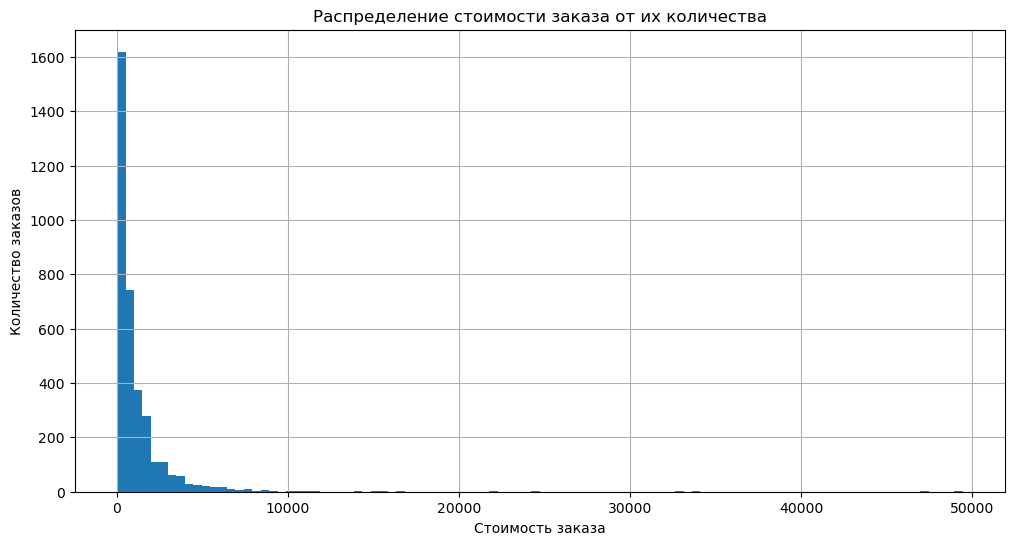

In [23]:
#сгруппируем данные по заказу и проверим чек заказа
df.groupby('order_id').agg({'sales': 'sum'}).hist(bins=100, figsize=(12, 6))
plt.title('Распределение стоимости заказа от их количества')
plt.xlabel('Стоимость заказа')
plt.ylabel('Количество заказов');

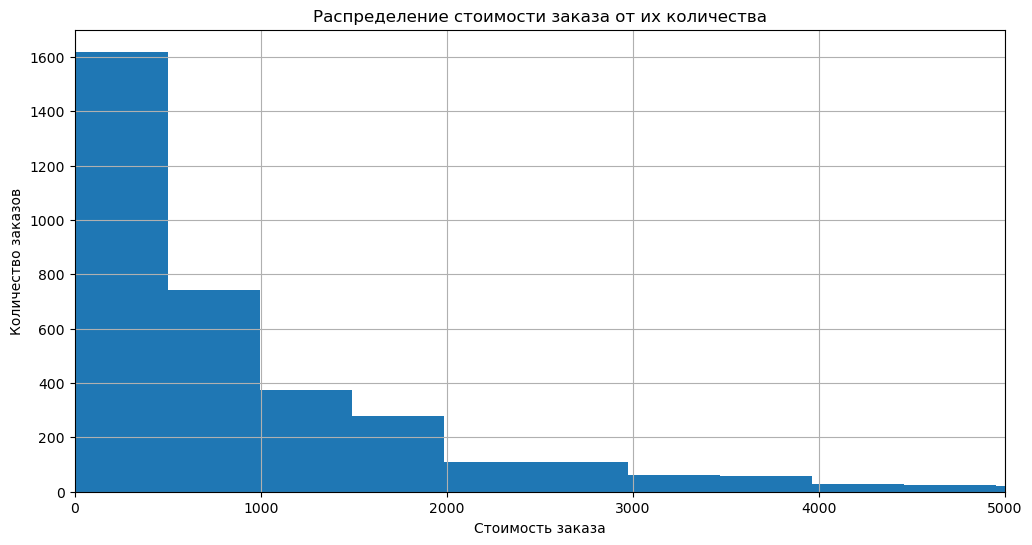

In [24]:
#построим укрупненный график
df.groupby('order_id').agg({'sales': 'sum'}).hist(bins=100, figsize=(12, 6))
plt.title('Распределение стоимости заказа от их количества')
plt.xlabel('Стоимость заказа')
plt.xlim(0, 5000)
plt.ylabel('Количество заказов');

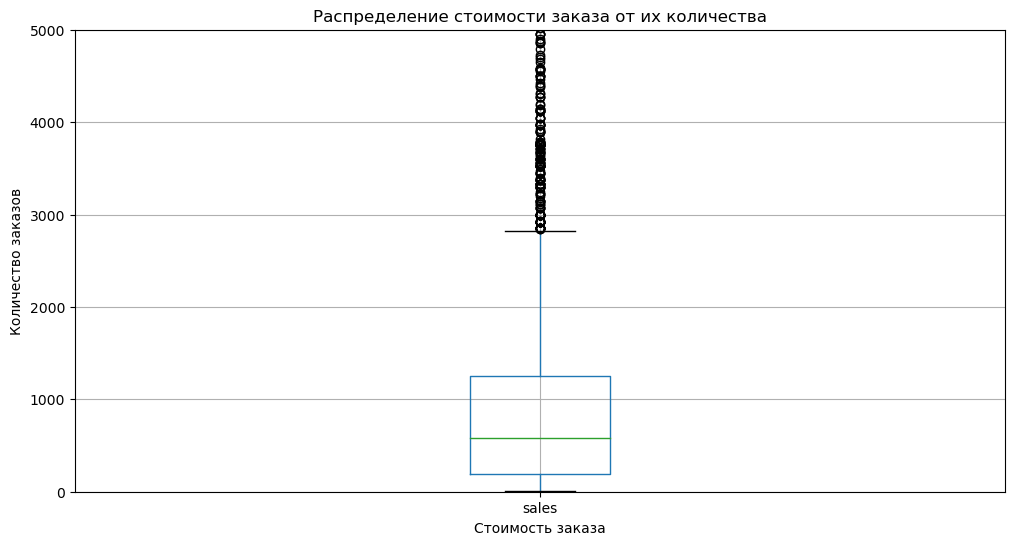

In [25]:
df.groupby('order_id').agg({'sales': 'sum'}).boxplot(figsize=(12, 6))
plt.title('Распределение стоимости заказа от их количества')
plt.xlabel('Стоимость заказа')
plt.ylim(0, 5000)
plt.ylabel('Количество заказов');

Прослеживается четкая тенденция  - чем выше чек, тем меньшее количество заказов сделано. \
Каких-то пиковых значений нет, постепенный спад при увеличении стоимости заказа.  

Чаще всего имеются небольшие заказы стоимостью до 500 рублей (таких заказов почти 1600) - это почти 50% от общего количества.
заказов.

Почти все заказы имеют чек ниже 5000 р.
Все заказы с чеком выше 3000 р считаются уже выбросами, т.е. это отдельные единичные заказы.

### Количество товаров в заказе

In [26]:
#посчитаем число уникальных заказов
print('Общее число уникальных заказов', df['order_id'].nunique())

Общее число уникальных заказов 3520


In [27]:
df.pivot_table(index='quantity', values='order_id',  aggfunc={'order_id': 'nunique'}).head(10)

,order_id
quantity,
1,2827
2,373
3,113
4,84
5,48
6,36
7,21
8,13
9,7


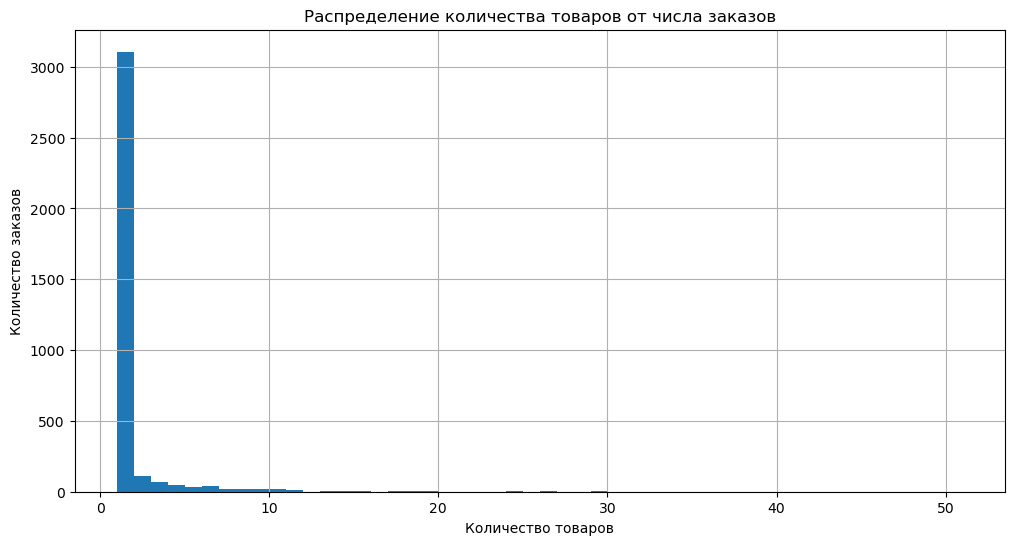

In [28]:
#сгруппируем данные по заказу и проверим среднее кол-во товаров в заказе

df.groupby('order_id').agg({'quantity': 'count'}).hist(bins=50, figsize=(12, 6))
plt.title('Распределение количества товаров от числа заказов')
plt.xlabel('Количество товаров')
#plt.xlim(0, 20)
plt.ylabel('Количество заказов');

Как видим из графика, более 3000 заказов идут только с 1 товаром. 2 товара покупают не более 150 человек. 
Больше 2 товаров в заказе практически нет у магазина. Было бы неплохо добавить какую-то акцию для увиличения числа позиций в заказе.

### Количество заказов на одного покупателя

In [29]:
#посчитаем число уникальных покупателей
print('Общее число уникальных покупателей', df['customer_id'].nunique())

Общее число уникальных покупателей 2431


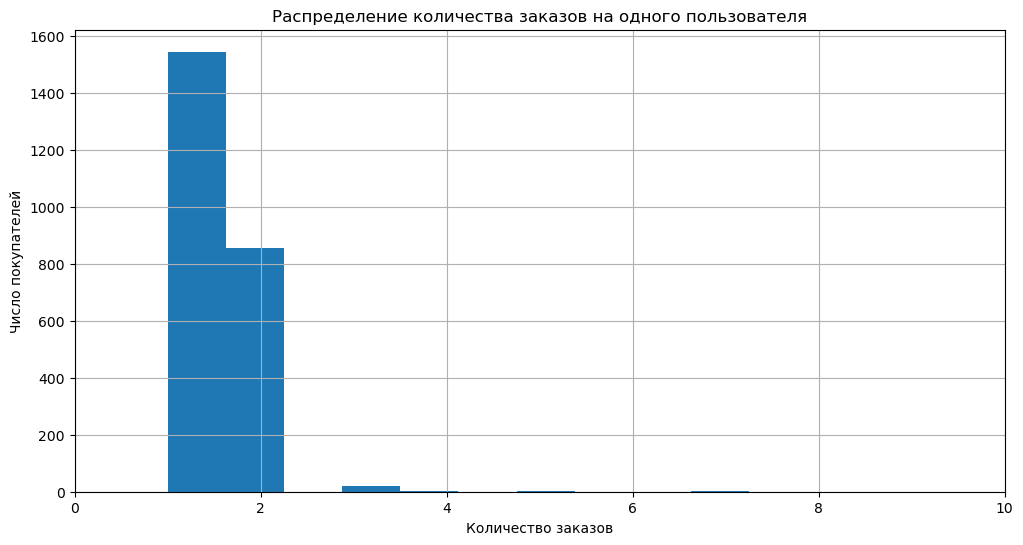

In [30]:
#проверим кол-во заказов на одного пользователя
df.groupby('customer_id').agg({'order_id': 'nunique'}).hist(bins=200, figsize=(12, 6))
plt.title('Распределение количества заказов на одного пользователя')
plt.xlabel('Количество заказов')
plt.xlim(0, 10)
plt.ylabel('Число покупателей');

По гистограмме видно, что большинство покупателей совершают 1 или 2 покупки: \
    1 покупка - почти у 1600 покупателей и это наибольшее количество (60% от общего количества); \
    2 покупки у 850 покупателей (30%); \
    3 и больше покупок делают не более 50 человек на каждое число заказов. \
    С увеличением количества заказов падает количество таких покупателей.

### Изменение выручки во времени

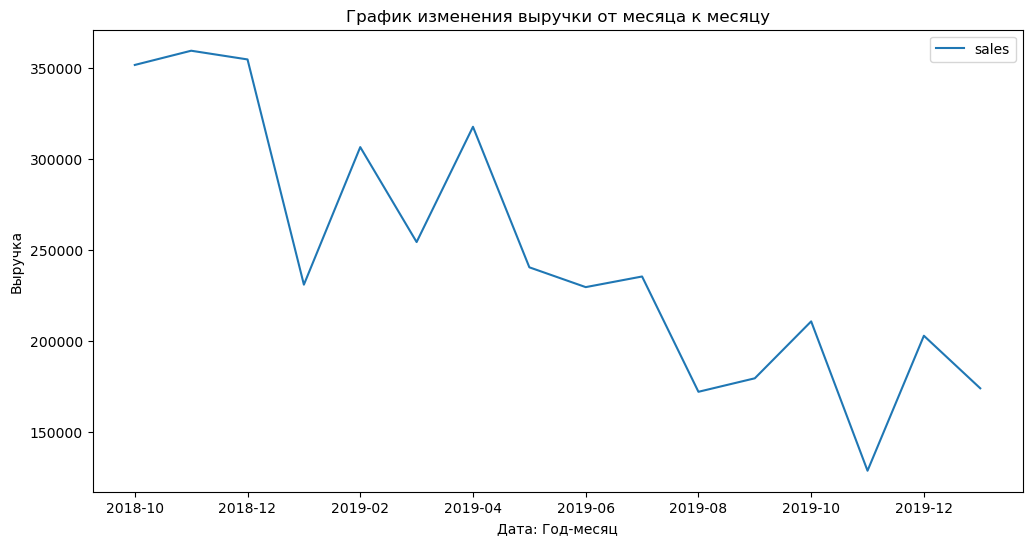

In [31]:
#посмотрим как меняется выручка в динамике по месяцам
df.groupby('y_m').agg({'sales': 'sum'}).plot(figsize=(12, 6))
plt.title('График изменения выручки от месяца к месяцу')
plt.xlabel('Дата: Год-месяц')
plt.ylabel('Выручка');

При более детальном просмотре графика видим, что выручка постепенно падает со временем. Самая хорошая выручка была в начале промежутка исследования, в конце 2018 года ( 350 тыс. р). 
Затем январе и марте 2019 года был резкий спад в продажах ( до 250тыс р), 
Ферваль и апрель - положит динамика на 300 тыс. р. в месяц.

А вот начиная с мая 2019 года выручка в целом упала по магазину и не поднималась больше выше уровня 250 т.р. Джае в ноябре 2019 года была всего лишь около 50 т.р. в месяц.

### Количество заказов с течением времени

Давайте проверим из-за чего падает выручка.

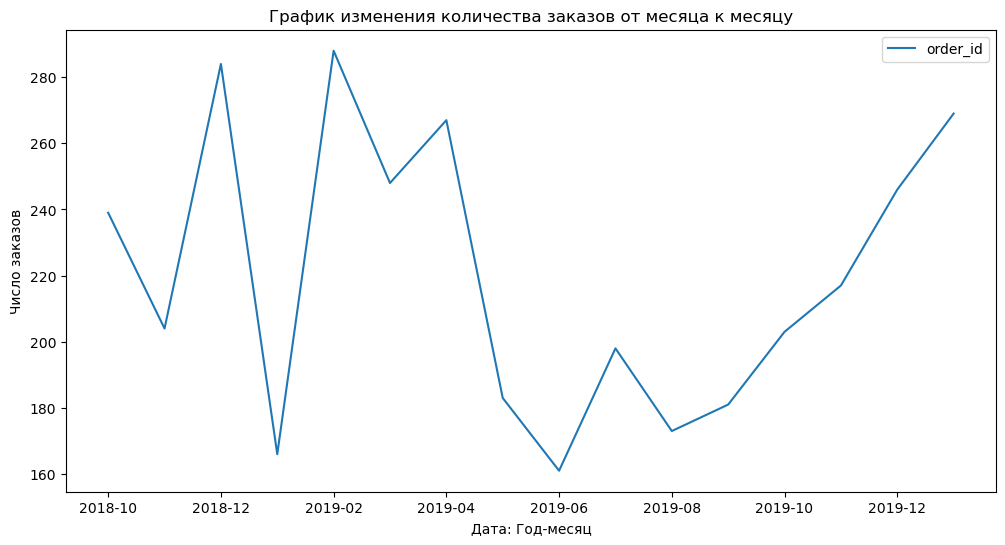

In [32]:
#посмотрим как изменяется число заказов в динамике по месяцам
df.groupby('y_m').agg({'order_id': 'nunique'}).plot(figsize=(12, 6))
plt.title('График изменения количества заказов от месяца к месяцу')
plt.xlabel('Дата: Год-месяц')
plt.ylabel('Число заказов');

Количество заказов отличается довольно сильно от графика по выручке. \
В декабре 2018 и феврале 2019 года было максимальное количество заказов.

Также хорошие показатели с ферваля по апрель 2019 года. А вот начиная с мая 2019, года была сильная просадка по числу заказов. 

Начиная с августа 2019 года, каждый месяц число закаов стало равсти и к январю 2020 года почти достигло значения от апреля 2020 года.

### Динамика среднего чека заказа во времени

In [33]:
#проверим как изменяется средний чек в зависимости от месяца
df_revenue = df.pivot_table(index='y_m', aggfunc={'sales':'sum', 'order_id':'nunique'}).reset_index()
df_revenue['revenue'] = df_revenue['sales'] / df_revenue['order_id']
df_revenue

,y_m,order_id,sales,revenue
0,2018-10,239,351536.000000,1470.861925
1,2018-11,204,359348.000000,1761.509804
2,2018-12,284,354566.000000,1248.471831
3,2019-01,166,230934.000000,1391.168675
4,2019-02,288,306442.000000,1064.034722
5,2019-03,248,254320.000000,1025.483871
6,2019-04,267,317602.000000,1189.520599
7,2019-05,183,240451.000000,1313.939891
8,2019-06,161,229575.000000,1425.931677
9,2019-07,198,235410.000000,1188.939394


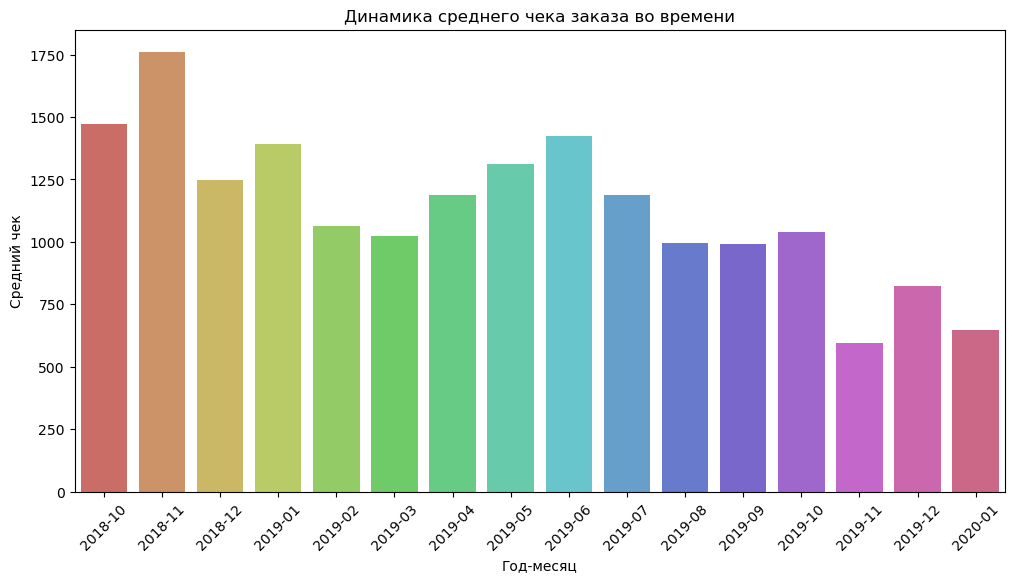

In [34]:
#построим график зависимости среднего чека от времени
plt.figure(figsize = (12,6))
sns.barplot(x='y_m', 
            y='revenue', 
            data=df_revenue, palette='hls')

plt.title('Динамика среднего чека заказа во времени')
plt.xlabel('Год-месяц')
plt.ylabel('Средний чек')
plt.xticks(rotation=45)
plt.show()

В ноябре 2018 года был самый максимальный показатель по среднему чеку заказа (1760 р). \
В целом данный график имеет волнообразный характер, средний чек, то постепенно растет, то также постепено спадает. \
В первой половине 2019 года он сначала снижался и в марте 2019 года был не столь велик ( 1000 р), а вот к июню снова начал расти (1420 р). 

Начиная с июня 2019 года, средний чек шел только вниз. И последние 3 месяца не остигал значения выше 800 р.                                                                                                                                        

Как мы и предполагали, резкое снижение среднего чека с января по май 2019 года послужило причиной того, что выручка не стала сильно расти, не смотря на большее количество заказов.

<b>Вывод:</b>\
Средний чек заказа находится в пределах 500 р и таких заказов около 50% от общего количества.
Средний чек не превышает 3000 р для большинства покупателей.

Чаще всего покупатели покупают лишь одну позицию товара в заказе. \
Было бы здорово предложить им какую-то акцию при совершении 2-ого или третьего товара в корзине. \
К примеру, чем больше товаров в корзине, тем выше общая скидка на покупку.

Покупатели преимущественно совершали 1 или 2 покупки в магазине, довольно мало постоянных клиентов (всего 28 человек).

Самая большая выручка 350 т.р. была в конце 2018 года ( октябрь-декабрь). Начиная с мая 2019 года выручка падала и не превышала 250 т.р.
В ноябре 2019 года сильная просадка по выручке - всего лишь 50 т.р. 

Выручка магазина зависит от 2 параметров: количества заказов и среднего чека заказа.
Количество заказов в января по май 2019 года сильно выросло, но одновременни с этим средний чек неумоливо падал вниз. Вследствие чего общая выручка не дала желаемого всплекса, а получила среднее значение и далее продолжила падать вниз.

## 4 Сегментация

### Выделение категорий для товаров

In [35]:
#добавим новый столбец, в котором указаны первые 2 слова названия
df['pr'] = df['product'].apply(lambda x: x.split(' ')[:2])

df.head()

,date,customer_id,order_id,product,quantity,price,month,year,quarter,y_m,sales,pr
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,10,2018,4,2018-10,142.0,"[комнатное, растение]"
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,10,2018,4,2018-10,194.0,"[комнатное, растение]"
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,10,2018,4,2018-10,112.0,"[радермахера, d-12]"
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,10,2018,4,2018-10,179.0,"[хризолидокарпус, лутесценс]"
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,10,2018,4,2018-10,112.0,"[циперус, зумула]"


In [36]:
#отобразим все возмодные уникальные пары названий
numbers = df['pr']
def get_unique_prs(numbers):
    unique = []
    for i in numbers:
        if i not in unique:
            unique.append(i)
            #unique += i
    return unique

print(get_unique_prs(numbers))

[['комнатное', 'растение'], ['радермахера', 'd-12'], ['хризолидокарпус', 'лутесценс'], ['циперус', 'зумула'], ['шеффлера', 'лузеана'], ['юкка', 'нитчатая'], ['настенная', 'сушилка'], ['таз', 'пластмассовый'], ['чехол', 'для'], ['вешалка', 'для'], ['сушилка', 'для'], ['чехол', 'eurogold'], ['крючок', 'одежный'], ['корзина', 'мягкая'], ['мини-сковорода', 'marmiton'], ['сковорода', 'алюминиевая'], ['стеклянная', 'крышка'], ['доска', 'гладильная'], ['сумка-тележка', '2-х'], ['многолетнее', 'растение'], ['рассада', 'зелени'], ['муляж', '"райские'], ['муляж', 'банан,'], ['муляж', 'виноград'], ['муляж', 'гранат'], ['муляж', 'груша'], ['муляж', 'груша,'], ['муляж', 'зеленое'], ['муляж', 'клубника'], ['муляж', 'красное'], ['муляж', 'лимон,'], ['муляж', 'мандарин,'], ['муляж', 'перец,'], ['муляж', 'персики'], ['муляж', 'томат,'], ['муляж', 'черешня'], ['щетка-сметка', '3-х'], ['щетка-сметка', '4-х'], ['сумка', 'для'], ['тарелка', 'обеденная'], ['вилка', 'столовая'], ['ложка', 'столовая'], ['ложк

In [37]:
#создадим списки, в которых прописаны самые часто встречающиеся названия и отсортируем их по категориям

tree = ['растение', 'радермахера', 'хризолидокарпус', 'циперус', 'шеффлера', 'юкка', 'эвкалипт', 'рассада', 'герань', \
        'пеларгония', 'суккулент', 'эхеверия', 'цветок', 'адиантум', 'кампанула', 'калатея', 'нолина', 'хлорофитум', \
       'цикламен', 'глоксиния', 'азалия', 'гортензия', 'хризантема', 'мирт', 'кориандр', 'сантолина', 'иссоп', \
        'аспарагус', 'афеляндра', 'фиалка', 'молодило', 'гербера', 'роза', 'гвоздика', 'лавр', 'литопс', 'фуксия', \
        'салат', 'эхеверия', 'петрушка', 'диффенбахия', 'амариллис', 'розмарин', 'замиокулькас', 'клен', 'импатиенс', \
        'спатифиллум', 'мединилла', 'зверобой', 'лантана', 'хамедорея', 'лилиана', 'шалфей', 'табак', 'травы', \
        'колокольчик', 'камнеломка', 'бадан', 'лен', 'физостегия', 'солидаго', 'бузульник', 'астра', 'алиссум', \
        'аквилегия', 'сциндапсус', 'осина', 'бегония', 'вербена', 'барвинок', 'бакопа', 'седум', 'лапчатка', 'монарда', \
        'гайлардия', 'хоста', 'фатсия', 'драцена', 'петуния', 'джункус', 'клубника', 'маттиола', 'целозия', 'петуния', \
        'кореопсис', 'тагетис', 'лобелия', 'виноград', 'настурция', 'базилик', 'цинния', 'календула', 'земляника', \
        'бальзамин', 'синнингия', 'кумкват', 'флокс', 'эхинацея', 'космея']

veg = ['тыква', 'огурец', 'томат', 'кабачок', 'сельдерей', 'капуста', 'патиссон', 'дыня', 'баклажан', 'арбуз', \
       'томата']

goods = ['таз', 'сушилка', 'чехол', 'сковорода', 'мини-сковорода', 'доска', 'корзина', 'тележка', 'сумка-тележка', \
         'ерш', 'крючок', 'котел', 'прищепок', 'прищепки', 'дозатор', 'сумка', 'контейнер', 'перчатки', 'стремянка', \
         'банка', 'щетка', 'сверло', 'сверел', 'паста', 'швабра', 'коробка', 'поилки', 'ведро', 'тряпка', 'стяжки', \
         'совок', 'пакет', 'уголок', 'насадка', 'решетка', 'ручка', 'завертка', 'отбеливатель', 'ткань', 'мешок', \
        'набор', 'веревка', 'покрытие', 'угольник', 'шнур', 'лоток', 'ваза', 'корзинка', 'этажерка', 'бидон', \
         'антинакипин', 'скребок', 'фиксатор-шар', 'тряпкодержатель', 'веник', 'кашпо', 'средство']


kitchen = ['миксер', 'скалка', 'сковорода', 'крышка', 'нож', 'тарелка', 'вилка', 'ложка', 'кружек', 'кружка', \
          'фужеров', 'скатерть', 'кувшин', 'толкушка', 'противень', 'салфетка', 'покрывало', 'миксер', 'салатник', \
          'рыбочистка', 'стакан', 'кастрюля', 'кипятильник', 'половник', 'терка', 'соковыжималка', 'соковарка', \
          'сахарница', 'миска', 'хлебница', 'шприц', 'отделитель', 'сотейник', 'сито']

dummy = ['муляж']

house = ['вешалка', 'вешалка-стойка', 'коврик', 'ковер', 'плед', 'простыня', 'штора', 'плечики', 'полотенце', \
         'подушка', 'наматрасник', 'халат', 'пылесос', 'ванна', 'постельное', 'полотенце', 'стеллаж', 'пододеяльник', \
         'обувница-3', 'наволочка', 'весы', 'полка']


#создадим функцию, которая разделяет названия по категориям
def categorize_product(row):
    try:
        for i in tree:
            if i in row:
                return 'растения'
        
        for i in veg:
            if i in row:
                return 'овощи, фрукты'
            
        for i in goods:
            if i in row:
                return 'хозтовары'  
            
        for i in kitchen:
            if i in row:
                return 'кухонные принадлежности'
            
        for i in dummy:
            if i in row:
                return 'муляжи'    
            
        for i in house:
            if i in row:
                return 'товары для дома' 
            
        return 'прочие'    
                                
    except:
        return 'без категории'

In [38]:
#добавим новый столбец с категорией продукта
df['product_category'] = df['pr'].apply(categorize_product)

In [39]:
df.head(20)

,date,customer_id,order_id,product,quantity,price,month,year,quarter,y_m,sales,pr,product_category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,10,2018,4,2018-10,142.0,"[комнатное, растение]",растения
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,10,2018,4,2018-10,194.0,"[комнатное, растение]",растения
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,10,2018,4,2018-10,112.0,"[радермахера, d-12]",растения
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,10,2018,4,2018-10,179.0,"[хризолидокарпус, лутесценс]",растения
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,10,2018,4,2018-10,112.0,"[циперус, зумула]",растения
5,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,шеффлера лузеана d-9 см,1,164.0,10,2018,4,2018-10,164.0,"[шеффлера, лузеана]",растения
6,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,юкка нитчатая d-12 см h-25-35 см,1,134.0,10,2018,4,2018-10,134.0,"[юкка, нитчатая]",растения
7,2018-10-01,375e0724-f033-4c76-b579-84969cf38ee2,68479,настенная сушилка для белья gimi brio super 100,1,824.0,10,2018,4,2018-10,824.0,"[настенная, сушилка]",хозтовары
8,2018-10-01,6644e5b4-9934-4863-9778-aaa125207701,68478,"таз пластмассовый 21,0 л круглый ""водолей"" с61...",1,269.0,10,2018,4,2018-10,269.0,"[таз, пластмассовый]",хозтовары
9,2018-10-01,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,чехол для гладильной доски colombo persia beig...,1,674.0,10,2018,4,2018-10,674.0,"[чехол, для]",хозтовары


In [40]:
#проверим какие категории есть и остались ли пропуски
num = df['product_category']
print(get_unique_prs(num))

df['product_category'].isna().sum()

['растения', 'хозтовары', 'товары для дома', 'кухонные принадлежности', 'муляжи', 'прочие', 'овощи, фрукты']


0

Пропусков нет, добавились все категории, которые мы и предполагали

In [41]:
#группируем названия по категориям, сортируем по количеству таких позиций и также учитывая количетсво купленного товара
df_category = df.groupby('product_category').agg({'order_id': 'count', 'quantity': 'sum'}).sort_values(by='quantity', ascending=False)
df_category['share'] = round(df_category['quantity'] *100 / df_category['quantity'].sum(), 2)
df_category

,order_id,quantity,share
product_category,,,
растения,2317,3885,28.92
прочие,814,2987,22.23
хозтовары,1434,2742,20.41
муляжи,164,1483,11.04
кухонные принадлежности,281,1039,7.73
товары для дома,326,874,6.51
"овощи, фрукты",240,425,3.16


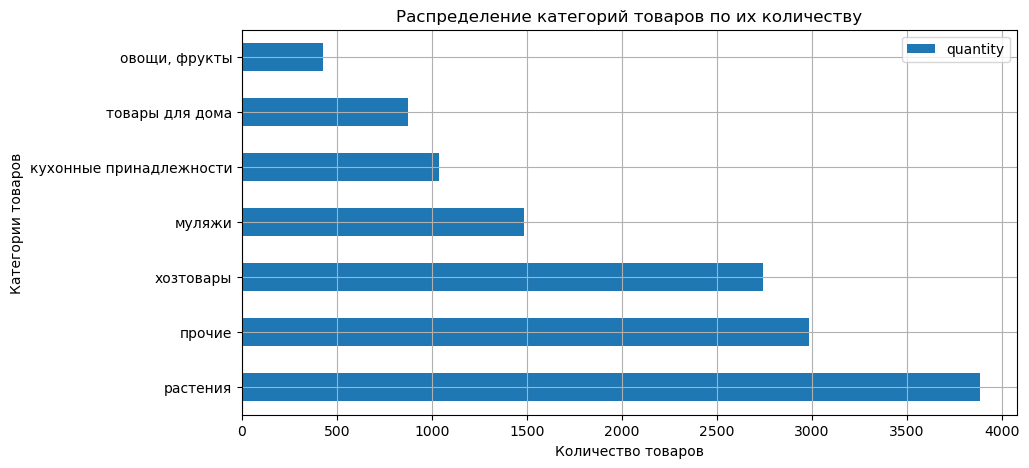

In [42]:
#простроим график по категориям
df.groupby('product_category').agg({'quantity': 'sum'}).sort_values(by='quantity', ascending=False)\
.plot(kind='barh', grid=True, figsize=(10,5))
plt.title('Распределение категорий товаров по их количеству')
plt.xlabel('Количество товаров')
plt.ylabel('Категории товаров');

Самая популярная категория - растения (3885 проданных товара), это пости 30% от общего количества.

2 и 3 место у категории прочее и хозтовары - 2900 и 2700 товаров соответственно.

Остальные категории встречаются реже. 
Овощи и фрукты на последнем месте, их покупают меньше всего, доля от общего количетва купленного товара - 3,2%.

### Подготовка к выделению сегментов

In [43]:
#группируем покупателей по количеству сделанных заказов, сортируем их по убыванию
df_f = df.groupby('customer_id').agg({'order_id': 'nunique'}).sort_values(by='order_id', ascending=False)
df_f.head(10)

,order_id
customer_id,
c971fb21-d54c-4134-938f-16b62ee86d3b,126
4d93d3f6-8b24-403b-a74b-f5173e40d7db,35
73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17
b7b865ab-0735-407f-8d0c-31f74d2806cc,7
0184f535-b60a-4914-a982-231e3f615206,5
498f12a4-6a62-4725-8516-cf5dc9ab8a3a,4
e0535076-6270-4df2-8621-cb06264a94fa,4
bea7a833-2074-42db-bc49-4457abd3c930,4
552e17df-ba16-4e66-84fb-55a5557a6bea,3


Покупателей, которые регулярно делают заказы в этом магазине не так много. Только 3 покупателя сделали более 10 заказов. \
В остальном число заказов не превышает 5. В основном количество покупок ограничивается 1 или двумя заказами. 

Есть 1 покупатель, который сделал 126 заказа. Посмотрим его более внимательно, чтобы понимать что это за клиент.

In [44]:
#выделим клиента с 126 заказами
df.query('customer_id == "c971fb21-d54c-4134-938f-16b62ee86d3b"')

,date,customer_id,order_id,product,quantity,price,month,year,quarter,y_m,sales,pr,product_category
9,2018-10-01,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,чехол для гладильной доски colombo persia beig...,1,674.0,10,2018,4,2018-10,674.0,"[чехол, для]",хозтовары
20,2018-10-02,c971fb21-d54c-4134-938f-16b62ee86d3b,68490,чехол для гладильной доски festival 137x60 см ...,1,1162.0,10,2018,4,2018-10,1162.0,"[чехол, для]",хозтовары
62,2018-10-03,c971fb21-d54c-4134-938f-16b62ee86d3b,68511,набор прищепок большие пластиковые rozenbal пи...,10,86.0,10,2018,4,2018-10,860.0,"[набор, прищепок]",хозтовары
63,2018-10-03,c971fb21-d54c-4134-938f-16b62ee86d3b,68514,сушилка для белья attribute прима 11 м синяя н...,1,749.0,10,2018,4,2018-10,749.0,"[сушилка, для]",хозтовары
126,2018-10-08,c971fb21-d54c-4134-938f-16b62ee86d3b,68561,тележка багажная delta тбр-20 коричневый с ора...,1,742.0,10,2018,4,2018-10,742.0,"[тележка, багажная]",хозтовары
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2076,2019-03-04,c971fb21-d54c-4134-938f-16b62ee86d3b,70582,нефролепис бостон d-12 см,1,292.0,3,2019,1,2019-03,292.0,"[нефролепис, бостон]",прочие
2078,2019-03-04,c971fb21-d54c-4134-938f-16b62ee86d3b,70589,калла крупноцветковая желтая,1,374.0,3,2019,1,2019-03,374.0,"[калла, крупноцветковая]",прочие
2095,2019-03-05,c971fb21-d54c-4134-938f-16b62ee86d3b,70606,пеларгония розебудная red pandora укорененный ...,1,134.0,3,2019,1,2019-03,134.0,"[пеларгония, розебудная]",растения
2099,2019-03-05,c971fb21-d54c-4134-938f-16b62ee86d3b,70614,гладильная доска ника lora fashion hlf 123х46 см,1,1949.0,3,2019,1,2019-03,1949.0,"[гладильная, доска]",хозтовары


Это реальный клиент, который периодически покупает разные товары в этом магазине.

In [45]:
#основные характиристики по покупателям и числу заказов
df_f.describe()

,order_id
count,2431.000000
mean,1.448787
std,2.688443
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,126.000000


Более 50% покупателей делают 1 заказ, только 25% далают 2 заказа.

### Сегментация по RFM-анализу

Теперь займемся выделением сегментов на основе RFM-анализа. 

Давность покупки (Recency) - количество дней с момента последней покупки; \
Частота покупок (Frequency) - общее количество заказов; \
Сумма покупки (Monetary) - общая сумма принесенных денег.

In [46]:
#определим последний день заказа
print('Крайний день покупки', df['date'].max())

NOW = dt.datetime(2020,1,31)

Крайний день покупки 2020-01-31


In [47]:
#переведем столбец date в формат datetime
df['date'] = pd.to_datetime(df['date'])

# создадим rfm таблицу
rfm_df = df.groupby('customer_id').agg({'date': lambda x: (NOW - x.max()).days, # Recency
                                                'order_id': lambda x: len(x.unique()), # Frequency
                                                'sales': lambda x: x.sum()})    # Monetary 

rfm_df['date'] = rfm_df['date'].astype(int)

rfm_df.rename(columns={'date': 'recency', 
                         'order_id': 'frequency',
                         'SALES': 'monetary_value'}, inplace=True)
rfm_df.head()

,recency,frequency,sales
customer_id,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,107,1,555.0
001cee7f-0b29-4716-b202-0042213ab038,349,1,442.0
00299f34-5385-4d13-9aea-c80b81658e1b,109,1,914.0
002d4d3a-4a59-406b-86ec-c3314357e498,369,1,1649.0
003bbd39-0000-41ff-b7f9-2ddaec152037,124,1,2324.0


Итак, мы получили сводную таблицу, где для каждого покупателя определяется давность, частота и сумма покупки. \
Теперь на основе этих данных нам нужно выделить 5 сегментов пользователей. На сегменты будем делить, основываясь на равном делении по квантилям.

In [48]:
quantiles = rfm_df.quantile(q=[0.20, 0.40, 0.60, 0.80])
quantiles

,recency,frequency,sales
0.2,59.0,1.0,300.0
0.4,141.0,1.0,644.0
0.6,267.0,1.0,1087.0
0.8,372.0,2.0,2109.0


In [49]:
#переведем квантили в словарь
#quantiles = quantiles.to_dict()

#сегментируем таблицу rfm
RFM_Segment = rfm_df

#аргементы (x = value, p = recency, monetary, frequency, k = quartiles dict)
def R_Class(x,p,d):
    if x <= d[p][0.20]:
         return 5
    elif x <= d[p][0.40]:
         return 4
    elif x <= d[p][0.60]: 
         return 3
    elif x<=d[p][0.80]:
         return 2
    else:
         return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FM_Class(x,p,d):
    if x <= d[p][0.20]:
         return 1
    elif x <= d[p][0.40]:
         return 2
    elif x <= d[p][0.60]: 
         return 3
    elif x<=d[p][0.80]:
         return 4
    else:
         return 5
    
RFM_Segment['R_Quartile'] = RFM_Segment['recency'].apply(R_Class, args=('recency',quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['frequency'].apply(FM_Class, args=('frequency',quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['sales'].apply(FM_Class, args=('sales',quantiles,))
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)

RFM_Segment.head()

,recency,frequency,sales,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,107,1,555.0,4,1,2,412
001cee7f-0b29-4716-b202-0042213ab038,349,1,442.0,2,1,2,212
00299f34-5385-4d13-9aea-c80b81658e1b,109,1,914.0,4,1,3,413
002d4d3a-4a59-406b-86ec-c3314357e498,369,1,1649.0,2,1,4,214
003bbd39-0000-41ff-b7f9-2ddaec152037,124,1,2324.0,4,1,5,415


Теперь каждый покупатель имеет "код", который определяет тип покупателя. \
Можно возвращаться к этой таблице и с разными условиями определять выборку тех или иных покупателей.

### Кластеризация покупателей на 5 сегментов.

При присвоении номера в rfm-анализе мы полагались на то, что чем больше число, тем покупатель "лояльнее". 
т.е. чем больше цифры, тем покупатель чаще совершает покупки, выше чек его заказа и не так давно покупал в последний раз.

In [50]:
#проверим какие наборы сегментов образовались
RFM_Segment['RFMClass'].unique()

array(['412', '212', '413', '214', '415', '445', '113', '542', '511',
       '541', '314', '544', '315', '312', '355', '213', '545', '115',
       '211', '311', '245', '144', '444', '543', '114', '442', '414',
       '111', '112', '344', '241', '313', '215', '451', '454', '443',
       '145', '411', '345', '242', '142', '244', '342', '341', '441',
       '143', '252', '354', '255', '155', '254', '353', '343', '455',
       '253', '243', '514', '352', '141', '512'], dtype=object)

In [51]:
# 1 категория - потерянные клиенты

print('Количество потерянных клиентов', \
      RFM_Segment[(RFM_Segment['F_Quartile'] == 1) \
                  & (RFM_Segment['R_Quartile'] <= 2) \
                  & (RFM_Segment['M_Quartile'] <= 2)]['sales'].count())

RFM_Segment[(RFM_Segment['F_Quartile'] == 1) & (RFM_Segment['R_Quartile'] <= 2) \
            & (RFM_Segment['M_Quartile'] <= 2)].sort_values('recency',ascending=False).head(5)

Количество потерянных клиентов 386


,recency,frequency,sales,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
29a514f5-a27e-4939-85d5-874a0c3f7a2c,486,1,193.0,1,1,1,111
f08d9018-438e-4e96-b519-f74c0302a433,486,1,359.0,1,1,2,112
32a85453-f14d-40c2-90ba-3851498a5f3b,486,1,374.0,1,1,2,112
5f75c73a-1305-4079-b040-2bcb42085002,486,1,299.0,1,1,1,111
eee7b1fa-ba81-4049-add6-370ee5e62e72,485,1,187.0,1,1,1,111


Количество потерянных клиентов - 391. Боюсь, что с этой категорией лучше попрощаться. Они сделали заказ только 1 раз на небольшую сумму и это было очень давно.\
Единственное, что можно сделать для них перед прощанием напомнить о себе - 
отправить рассылку с каким-то особым предложением вернуться в наш магазин, 
предоставив скидку на покупку по промокоду "возвращение" 
и начать копить баллы, которые можно будет использовать при следующих покупках.

In [52]:
# 2 категория - постоянные клиенты.
print('Количество постоянных клиентов', RFM_Segment[RFM_Segment['F_Quartile'] == 5]['sales'].count())
RFM_Segment[RFM_Segment['F_Quartile'] == 5 ].sort_values('sales', ascending=False).head()

Количество постоянных клиентов 28


,recency,frequency,sales,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
c971fb21-d54c-4134-938f-16b62ee86d3b,331,126,159508.0,2,5,5,255
4d93d3f6-8b24-403b-a74b-f5173e40d7db,464,35,57278.0,1,5,5,155
498f12a4-6a62-4725-8516-cf5dc9ab8a3a,287,4,41900.0,2,5,5,255
73d1cd35-5e5f-4629-8cf2-3fda829d4e58,92,17,21361.0,4,5,5,455
639c4989-b0ab-412a-b7ec-be394cb2d372,452,3,12095.0,1,5,5,155


Постоянных клиентво оказалось не много - всего 28 человек. \
К ним стоит относится со всей бережливостью и предлагать сотрудничество на особых условиях.

In [53]:
# 3 категория - новые клиенты
print('Количество новых клиентов', RFM_Segment[(RFM_Segment['R_Quartile'] >= 4) \
                                               & (RFM_Segment['F_Quartile'] == 1)]['sales'].count())

RFM_Segment[(RFM_Segment['R_Quartile'] >= 4) & (RFM_Segment['F_Quartile'] == 1)].sort_values('recency').head()

Количество новых клиентов 228


,recency,frequency,sales,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
a7ef9c85-57e1-45ad-89c9-8b405339d4c8,8,1,1930.5,5,1,4,514
a843e87d-c9b8-475a-96fb-1edcccca5f8e,23,1,60.0,5,1,1,511
95872093-2887-4ce8-8468-19234990e7d7,26,1,179.0,5,1,1,511
9ecc5887-b4d4-4cea-b446-88748df71d9c,27,1,1799.0,5,1,4,514
753660bf-a1ea-4447-853d-622e47c1c6ac,28,1,97.0,5,1,1,511


In [54]:
# 4 категория - лояльные клиенты
print('Количество лояльных клиентов', RFM_Segment[RFM_Segment['F_Quartile'] == 4]['sales'].count())

RFM_Segment[RFM_Segment['F_Quartile'] == 4].sort_values('sales', ascending=False).head()

Количество лояльных клиентов 857


,recency,frequency,sales,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
58a4c3cc-504f-43ea-a74a-bae19e665552,381,2,53232.0,1,4,5,145
940c175f-ea87-44e0-9e16-0a3d0a9abecd,233,2,20232.0,3,4,5,345
f279d50f-a508-40b4-bde5-5cb4a1be3ad0,31,2,16557.0,5,4,5,545
ad66d870-22f5-43bc-958f-73420822586b,68,2,13731.0,4,4,5,445
86c97bf1-c834-423e-9e38-8acda68f97e8,410,2,11548.0,1,4,5,145


In [55]:
# 5 категория - спящие клиенты
print('Количество спящих клиентов', RFM_Segment[(RFM_Segment['R_Quartile'] == 3) \
                                                & (RFM_Segment['M_Quartile'] >= 2)]['sales'].count())

RFM_Segment[(RFM_Segment['R_Quartile'] == 3) & (RFM_Segment['M_Quartile'] >= 2)].sort_values('sales', ascending=False).head()

Количество спящих клиентов 366


,recency,frequency,sales,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
146cd9bf-a95c-4afb-915b-5f6684b17444,234,1,49432.0,3,1,5,315
940c175f-ea87-44e0-9e16-0a3d0a9abecd,233,2,20232.0,3,4,5,345
5d189e88-d4d6-4eac-ab43-fa65a3c4d106,256,1,15300.0,3,1,5,315
0d87f4ae-465a-4fac-81e6-5d629761783e,186,1,14917.0,3,1,5,315
a9089b7e-e6a5-48f9-9b76-48693b63a092,259,3,11495.0,3,5,5,355


In [56]:
# создадим функцию, которая распределяет покупателей на созданные сегменты
def segment_customer(row):
    try:
        if row['F_Quartile'] == 1 \
        and row['R_Quartile'] <= 2 \
        and row['M_Quartile'] <= 2:
            return 'потерянные клиенты'
        
        elif row['F_Quartile'] == 5:
            return 'постоянные клиенты'
        
        elif row['R_Quartile'] >= 4 \
        and row['F_Quartile'] == 1:
            return 'новые клиенты'
        
        elif row['F_Quartile'] == 4:
            return 'лояльные клиенты'
        
        elif row['R_Quartile'] == 3 \
        and row['M_Quartile'] >= 2:
            return 'спящие клиенты'
        
        else:
            return 'средний сегмент'
        
    except:
        return 'без сегмента'

In [57]:
#добавим новый столбец с сегментов покупателя
RFM_Segment['segment'] = RFM_Segment.apply(segment_customer, axis=1)
RFM_Segment.head()

,recency,frequency,sales,R_Quartile,F_Quartile,M_Quartile,RFMClass,segment
customer_id,,,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,107,1,555.0,4,1,2,412,новые клиенты
001cee7f-0b29-4716-b202-0042213ab038,349,1,442.0,2,1,2,212,потерянные клиенты
00299f34-5385-4d13-9aea-c80b81658e1b,109,1,914.0,4,1,3,413,новые клиенты
002d4d3a-4a59-406b-86ec-c3314357e498,369,1,1649.0,2,1,4,214,средний сегмент
003bbd39-0000-41ff-b7f9-2ddaec152037,124,1,2324.0,4,1,5,415,новые клиенты


In [58]:
#проверим что не осталось пропусков в созданных сегментах
RFM_Segment['segment'].isna().sum()

0

Все чисто! Каждый покупатель определен к своему сегменту.

лояльные клиенты      857
средний сегмент       611
потерянные клиенты    386
спящие клиенты        321
новые клиенты         228
постоянные клиенты     28
Name: segment, dtype: int64


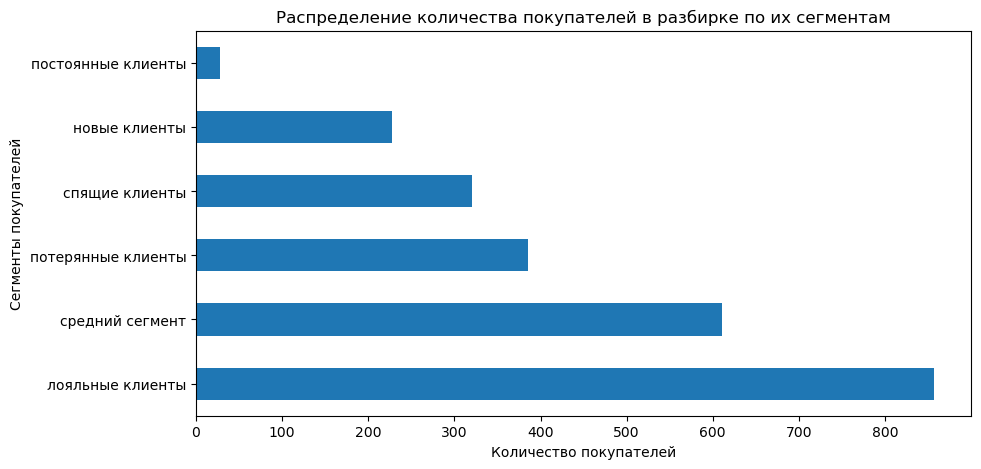

In [59]:
#проверим как распределились созданные сегменты по количеству покупателей
print(RFM_Segment['segment'].value_counts())

#построим график распределения сегментов покупатеелй по их количеству
RFM_Segment['segment'].value_counts().plot(kind='barh', figsize=(10, 5))
plt.title('Распределение количества покупателей в разбирке по их сегментам')
plt.xlabel('Количество покупателей')
plt.ylabel('Сегменты покупателей');

У нас получилось, что большинство покупателей - лояльные, на которых стоит обратить особое внимание, и которые могут очень сильно увеличить выручку магазина.

Постоянных клиентов не много, но для них рекомендую предложить особый подход и особые условия сотрудничества (карта постоянного клиента, карта лояльности, партнерские условия).

С категорией Потерянных клиентов считаю, что стоит расстаться и не тратить на них много времени. Можно лишь им выслать рассылку, которая может стимулировать их к повторной покупке. 

Спящих клиентов надо раскачивать, они давно у нас ничего не покупали, и им нужно напомнить о себе. И рассказать о новинках в интернет-магазине, которые произошли у нас за последний год.

Новым клиентам также надо рассказывать о наших новинках, в принципе о нашем продукте, чем он уникален и чем отличается от конкурентов. Предлагать "подарок" за следующую покупку, также для того чтобы стимулировать их к нам вернуться и желание остаться с нами.

Среднего сегмента тоже довольно много, они не приносили супер прибыли для нас. Поэтому в случае с этой категорией, думаю будет целесообразно рассказать о скидках или баллах за доп. товары в заказе. Им нужно "продавать идею" купить больше товаров в хаказе или чтобы сумма заказа были не ниже определенной границы.

## Исследовательский анализ данных

In [60]:
#объединим наш датафрейм с полученными значениями сегментов по покупателям
df = df.merge(RFM_Segment['segment'], on='customer_id', how='left')
df.head()

,date,customer_id,order_id,product,quantity,price,month,year,quarter,y_m,sales,pr,product_category,segment
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,10,2018,4,2018-10,142.0,"[комнатное, растение]",растения,средний сегмент
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,10,2018,4,2018-10,194.0,"[комнатное, растение]",растения,средний сегмент
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,10,2018,4,2018-10,112.0,"[радермахера, d-12]",растения,средний сегмент
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,10,2018,4,2018-10,179.0,"[хризолидокарпус, лутесценс]",растения,средний сегмент
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,10,2018,4,2018-10,112.0,"[циперус, зумула]",растения,средний сегмент


Начнем исследование разных показателей для каждой категории покупателей.

### Распределение категорий товара по сегментам покупателей

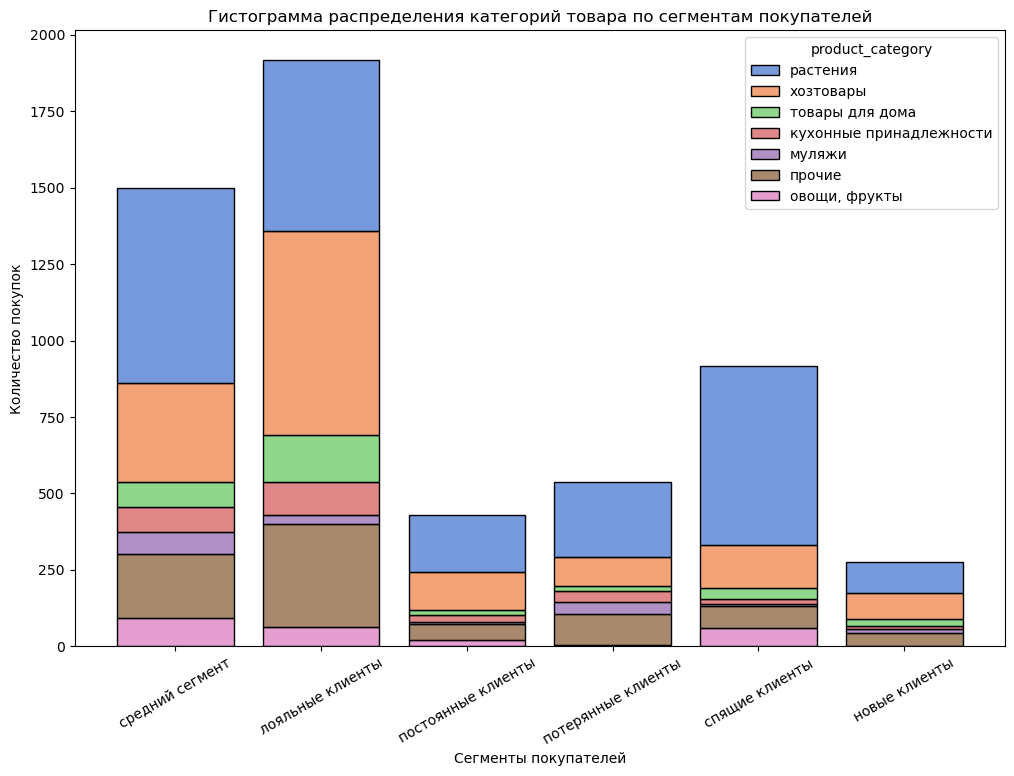

In [61]:
#построим график, отражающий распределение категорий товаров для каждого сегмента покупателей
plt.figure(figsize = (12,8))
sns.histplot(data=df, x='segment', hue='product_category', multiple="stack", shrink=.8, palette='muted')

plt.title('Гистограмма распределения категорий товара по сегментам покупателей')
plt.xlabel('Сегменты покупателей')
plt.ylabel('Количество покупок')
plt.xticks(rotation=30)
plt.show()

Превалирующее большинство из каждого сегмента покупают категорию растений - она лидирует. \
Вторым по популярности идет категория - хоз товары.

Но если посмотреть в разрезе сегментов покупателей - то для лояльных клиентов ( а это наши самые теплые клиенты, с которыми нужно налаживать контакт) больше покупают товаров для дома, а не для сада и огорода.
Здесь больше всего хозтоваров в покупках  и также много товаров для дома и кух. принадлежностей. Растения также покупают хорошо, но все же в меньшей степени.

А вот спящие клиенты в большинстве своем покупают именно растения для дома или для сада.

### Количество заказов в динамике по категориям товара

In [62]:
df_order = df.pivot_table(index=['y_m', 'product_category'], aggfunc={'order_id':'nunique'}).reset_index()
df_order.head()

,y_m,product_category,order_id
0,2018-10,кухонные принадлежности,24
1,2018-10,муляжи,9
2,2018-10,прочие,43
3,2018-10,растения,44
4,2018-10,товары для дома,23


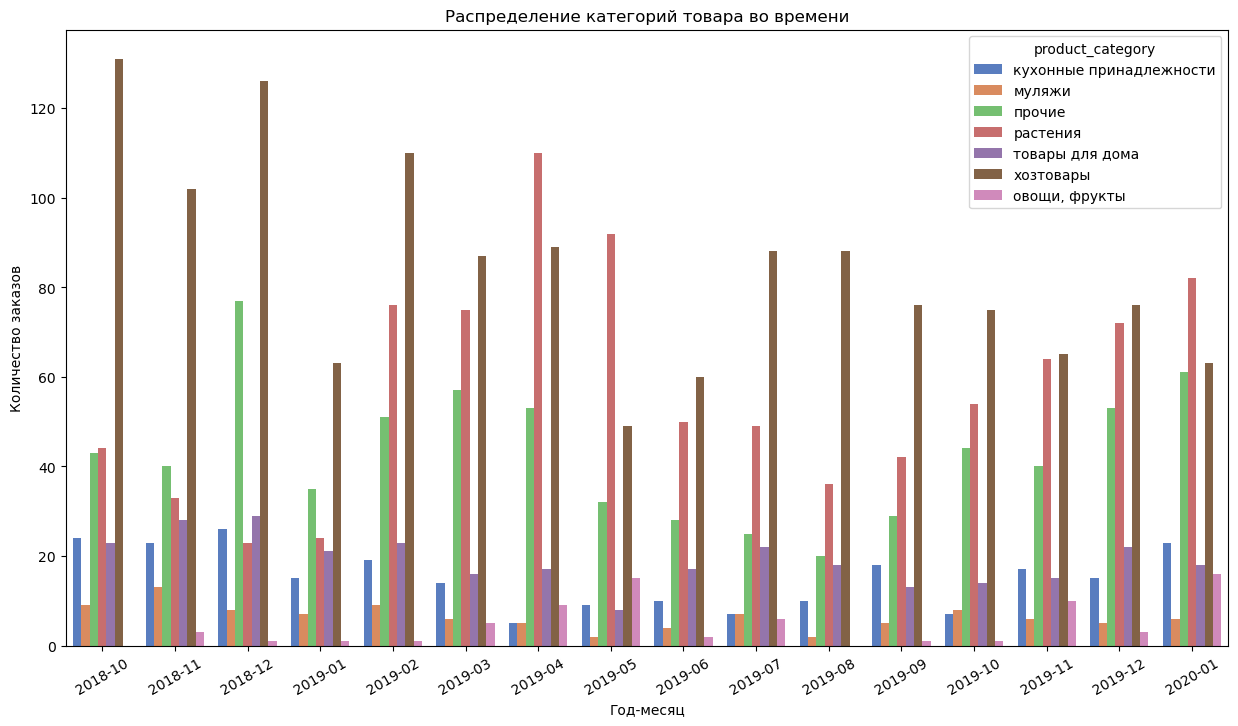

In [63]:
#построим график отражающий распределение количества заказов по сезонам для каждого сегмента
plt.figure(figsize = (15,8))
sns.barplot(data=df_order, x='y_m', y='order_id', hue='product_category', palette='muted')

plt.title('Распределение категорий товара во времени')
plt.xlabel('Год-месяц')
plt.ylabel('Количество заказов')
plt.xticks(rotation=30)
plt.show()

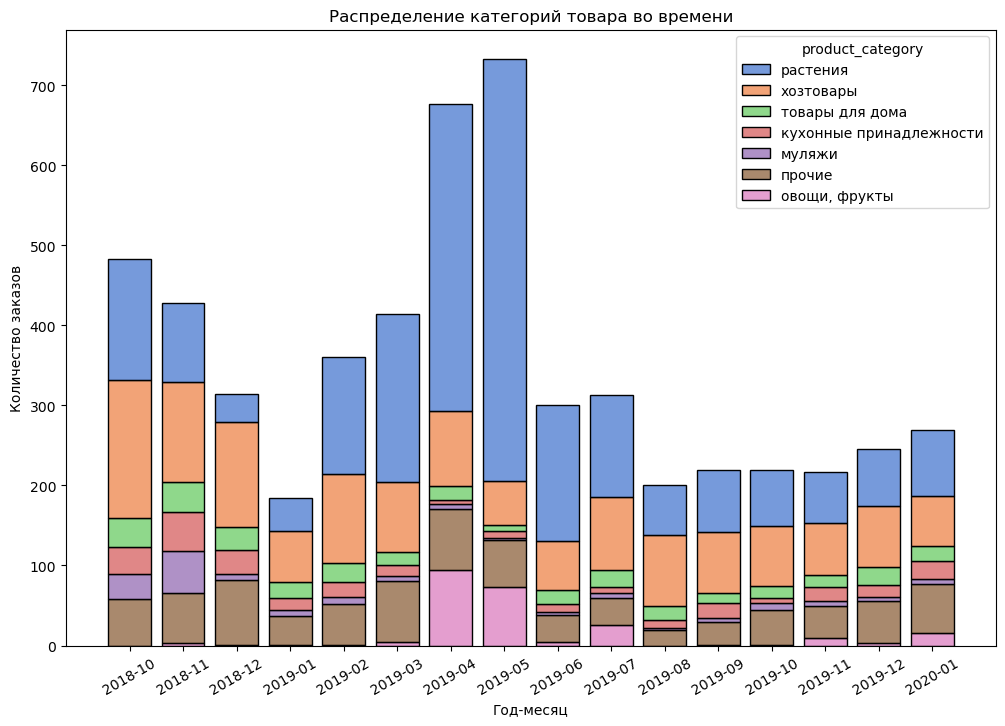

In [64]:
#построим график, отражающий распределение категорий товаров во времени
plt.figure(figsize = (12,8))
sns.histplot(data=df, x='y_m', hue='product_category', multiple="stack", shrink=.8, palette='muted')

plt.title('Распределение категорий товара во времени')
plt.xlabel('Год-месяц')
plt.ylabel('Количество заказов')
plt.xticks(rotation=30)
plt.show()

Видно, что рост выручки в апреде и мае 2019 года сформирован за счет высоких продаж растений. \
Это понятно, поскольку именно весна - активный сезон для посадок растений на даче и в огородах. 

Также в апреле и мае был рост пролаж по овощам и фруктам. Причины этот аналогичны категории с растениями - их начинают сажать к сезону.

Выручка в эти 2 месяца составляет 50% по сравнению со всеми другими категориями. В эти месяцы выручка была в 2 раза вышем, чем в июне, и иэто юлагодаря как раз продажам растений и овощей.

Стоит также отметить, что в октябре и ноябре 2018 года были самые большие продажи по хозтоварам, а вот в такой же сезон 2019 года эта тенденция уже не наблюдается. Возможно, что сменилось позиционирование магазина.

В целом, каждый месяц лидируют категории растения, хозтовары и прочее. Остальные категории прокупают намного реже.

### Количество заказов по сезонам для каждого сегмента

In [65]:
df_quarter = df.pivot_table(index=['segment', 'quarter'], aggfunc={'order_id':'nunique'}).reset_index()
df_quarter.head()

,segment,quarter,order_id
0,лояльные клиенты,1,562
1,лояльные клиенты,2,219
2,лояльные клиенты,3,233
3,лояльные клиенты,4,700
4,новые клиенты,1,5


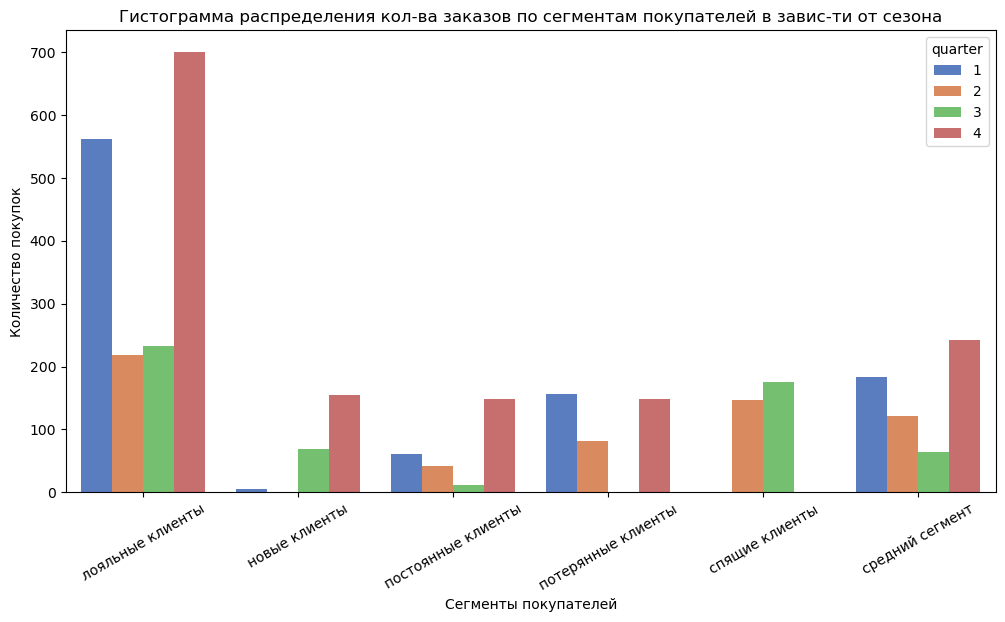

In [66]:
#построим график отражающий распределение количества заказов по сезонам для каждого сегмента
plt.figure(figsize = (12,6))
sns.barplot(data=df_quarter, x='segment', y='order_id', hue='quarter', palette='muted')

plt.title('Гистограмма распределения кол-ва заказов по сегментам покупателей в завис-ти от сезона')
plt.xlabel('Сегменты покупателей')
plt.ylabel('Количество покупок')
plt.xticks(rotation=30)
plt.show()

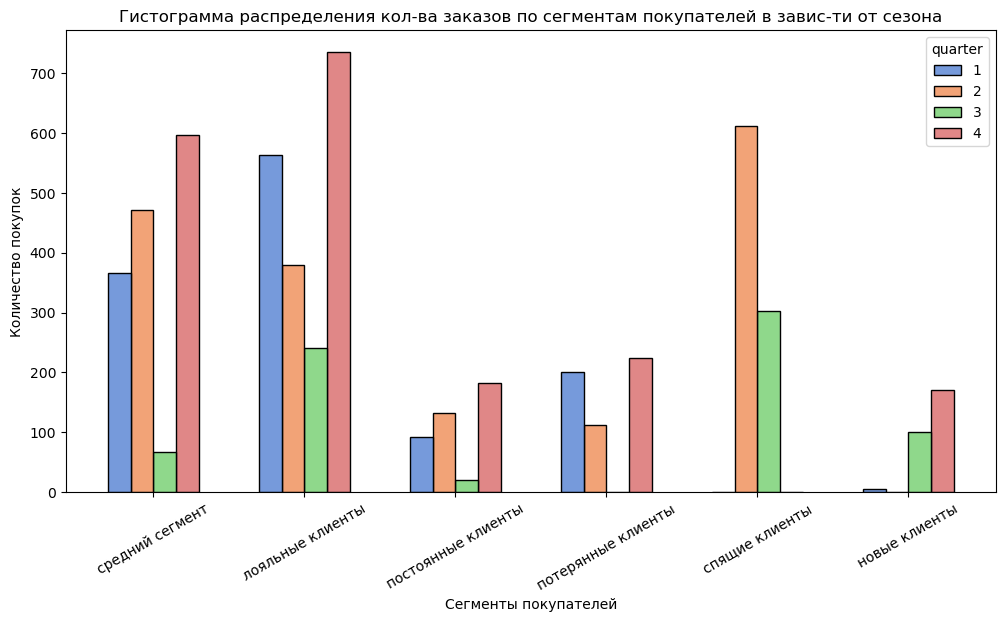

In [67]:
#построим график отражающий распределение количества строк в заказах по сезонам для каждого сегмента
plt.figure(figsize = (12,6))
sns.histplot(data=df, x='segment', hue='quarter', multiple="dodge", shrink=.6, palette='muted')

plt.title('Гистограмма распределения кол-ва заказов по сегментам покупателей в завис-ти от сезона')
plt.xlabel('Сегменты покупателей')
plt.ylabel('Количество покупок')
plt.xticks(rotation=30)
plt.show()

1 - весна
2 - лето
3 - осень
4 - зима

Самое большое количество покупок у лояльного и среднего сегмента в зимний период, а вот осенью продажи у них практически на нуле.
Лояльные клиенты также довольно хорошо покупают весной.

Спящие клиенты совершали много покупок летом, но часть сезонов у них не представлена ввиду сегментации. они включали ограниченный промежуток времени.

В целом, самый тяжело идущий сезон - осень для всех сегментов покупателей.

### Средний чек для каждого сегмента

In [68]:
#проверим какой средний чек приходится на каждый сегмент
df_seg = df.pivot_table(index='segment', aggfunc={'sales':'sum', 'order_id':'nunique', 'customer_id': 'nunique'}).reset_index()
df_seg['revenue'] = round(df_seg['sales'] / df_seg['order_id'], 2)
df_seg.sort_values(by='revenue', ascending=False)

,segment,customer_id,order_id,sales,revenue
5,средний сегмент,611,611,1.104005e+06,1806.88
4,спящие клиенты,321,321,5.603240e+05,1745.56
2,постоянные клиенты,28,262,3.526890e+05,1346.14
1,новые клиенты,228,228,2.474135e+05,1085.15
0,лояльные клиенты,857,1714,1.560671e+06,910.54
3,потерянные клиенты,386,385,1.232160e+05,320.04


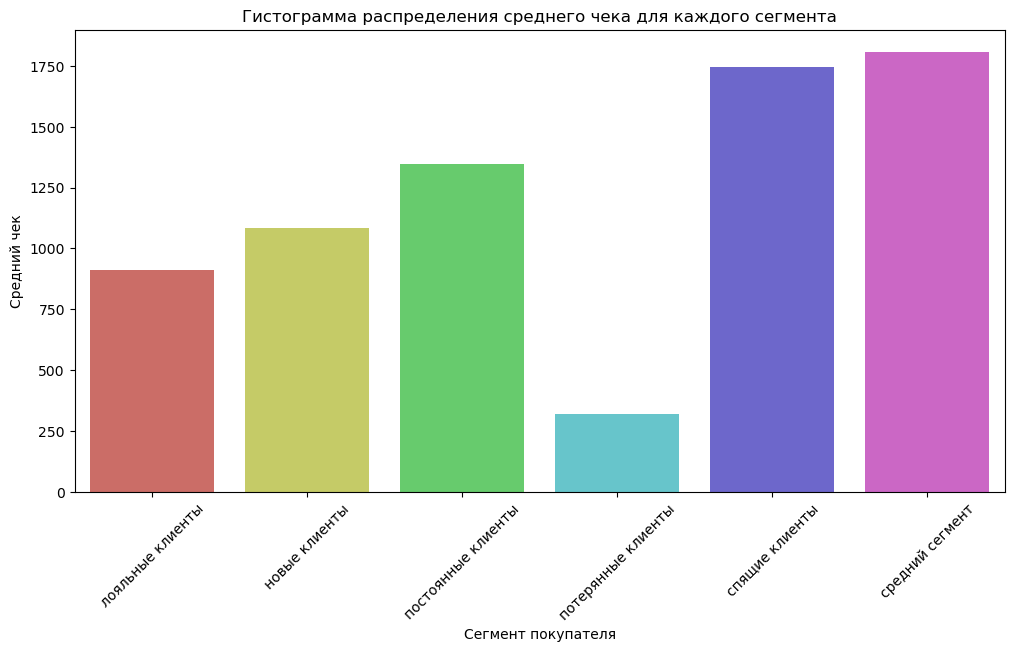

In [69]:
#построим гистограмму распределения среднего чека для каждого сегмента покупателей
plt.figure(figsize = (12,6))
sns.barplot(x='segment', 
            y='revenue', 
            data=df_seg, palette='hls')

plt.title('Гистограмма распределения среднего чека для каждого сегмента')
plt.xlabel('Сегмент покупателя')
plt.ylabel('Средний чек')
plt.xticks(rotation=45)
plt.show()

Самый высокий средний чек у среднего сегмента, и как это ни странно у спящего сегмента, они покупают на сумму около 1800 р.


Постоянные покупатели по среднему чеку находится где-то посерединке с чеком 1340 р.

С небольшим отставанием идут новые клиенты и лояльные (1000 р).
Но вот как видно из таблицы у них очень сильно различается число заказов. Т.е. лояльные клиенты покупают часто и понемногу. Новые клиенты еще не успели набрать себе много заказов, но вот средний чек схож с лояльными клиентами и это хороший знак.

И с самым низким средним чеком идут потерянные клиенты, средний чек которых 320 р.

### Количество заказов по сегментам покупателей

In [70]:
df_seg.sort_values(by='order_id', ascending=False)

#рассчитаем кол-во заказов на одного покупателя 
df_seg['ratio'] = df_seg['order_id'] / df_seg['customer_id']

df_seg

,segment,customer_id,order_id,sales,revenue,ratio
0,лояльные клиенты,857,1714,1.560671e+06,910.54,2.000000
1,новые клиенты,228,228,2.474135e+05,1085.15,1.000000
2,постоянные клиенты,28,262,3.526890e+05,1346.14,9.357143
3,потерянные клиенты,386,385,1.232160e+05,320.04,0.997409
4,спящие клиенты,321,321,5.603240e+05,1745.56,1.000000
5,средний сегмент,611,611,1.104005e+06,1806.88,1.000000


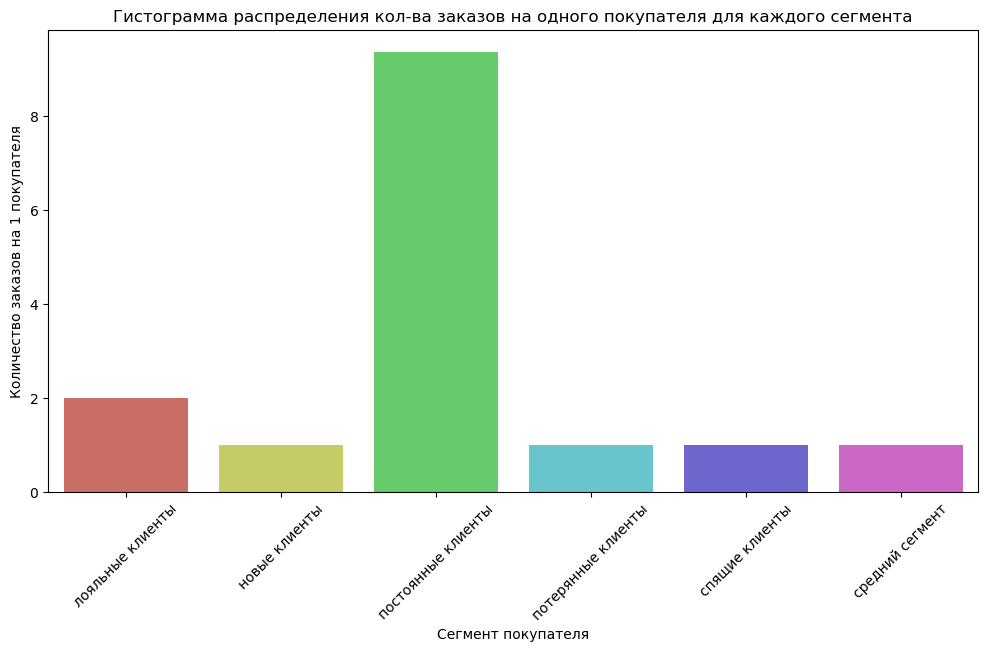

In [71]:
#построим гистограмму распределения количества заказов на одного покупателя для каждого сегмента
plt.figure(figsize = (12,6))
sns.barplot(x='segment', 
            y='ratio', 
            data=df_seg, palette='hls')

plt.title('Гистограмма распределения кол-ва заказов на одного покупателя для каждого сегмента')
plt.xlabel('Сегмент покупателя')
plt.ylabel('Количество заказов на 1 покупателя')
plt.xticks(rotation=45)
plt.show()

Постоянные покупатели делают в среднем по 9 заказов. Лояльные покупатели - 2 заказа, а остальные сегменты - по 1 заказу.

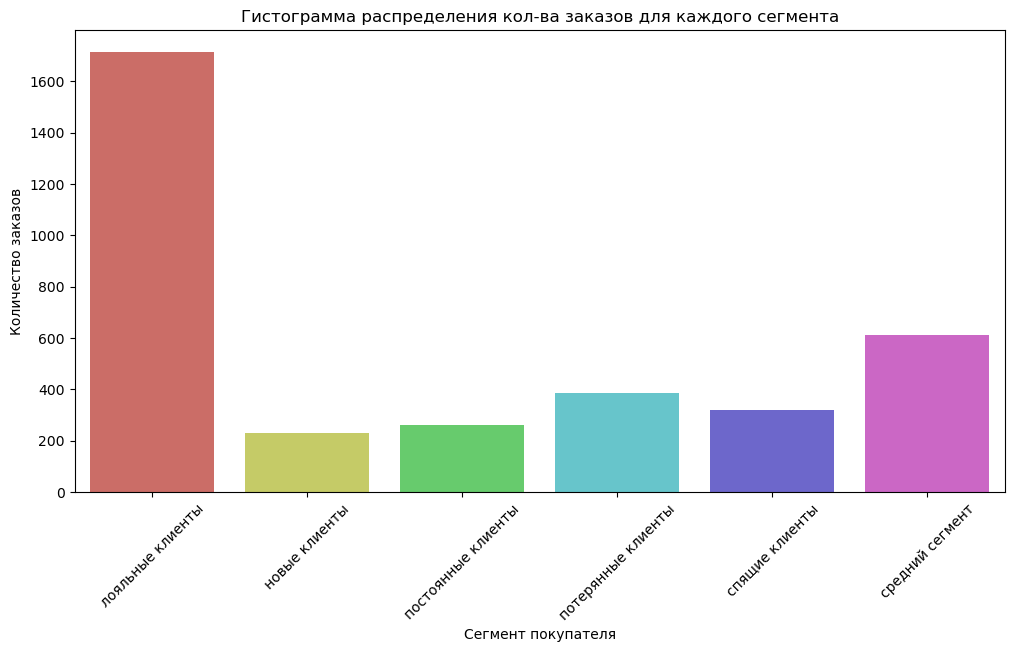

In [72]:
#построим гистограмму распределения количества заказов для каждого сегмента покупателей
plt.figure(figsize = (12,6))
sns.barplot(x='segment', 
            y='order_id', 
            data=df_seg, palette='hls')

plt.title('Гистограмма распределения кол-ва заказов для каждого сегмента')
plt.xlabel('Сегмент покупателя')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)
plt.show()

У лояльных клиентов самое большое количество заказов, причем с отрывом почти в 3 раза - 1700 заказов.\
Следующий по популярности сегмент - средний. у него 610 оформленных заказов.

Все остальные сегменты имеют примерно равное количество заказов в пределах погрешности - \
все заказы по количеству ниже 400, в пределах 250-390. 

### Выручка для каждого сегмента покупателей

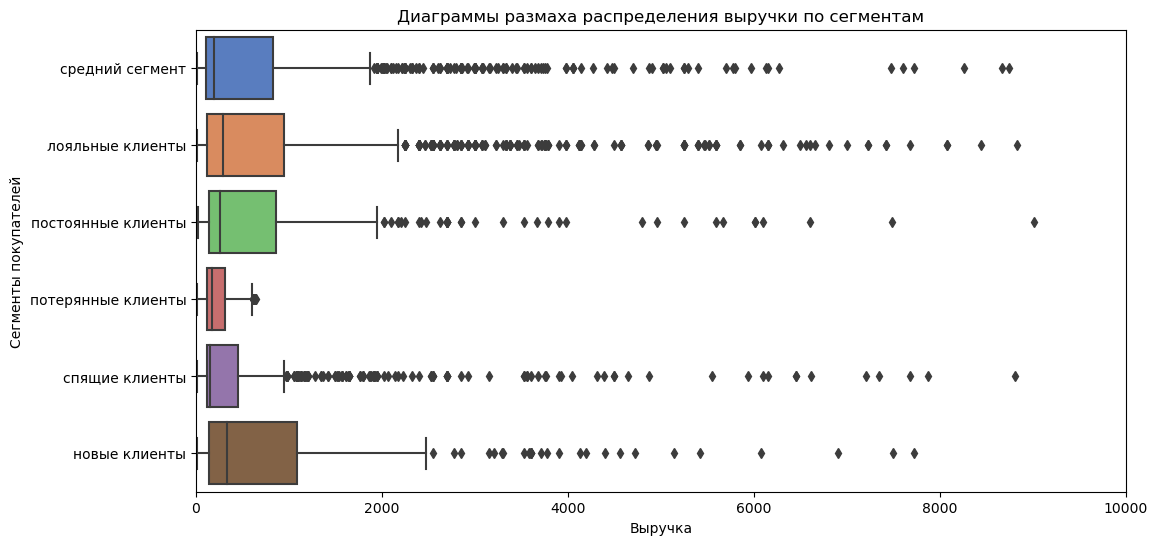

In [73]:
#зададим размер графика
plt.figure(figsize = (12,6))

#построим диаграммы размаха для каждой категории в разрезе средней выручки
ax=sns.boxplot(data=df, x='sales', y='segment', palette='muted')

plt.title('Диаграммы размаха распределения выручки по сегментам')
plt.xlabel('Выручка')
plt.ylabel('Сегменты покупателей')
plt.xlim(0, 10000)
plt.show()

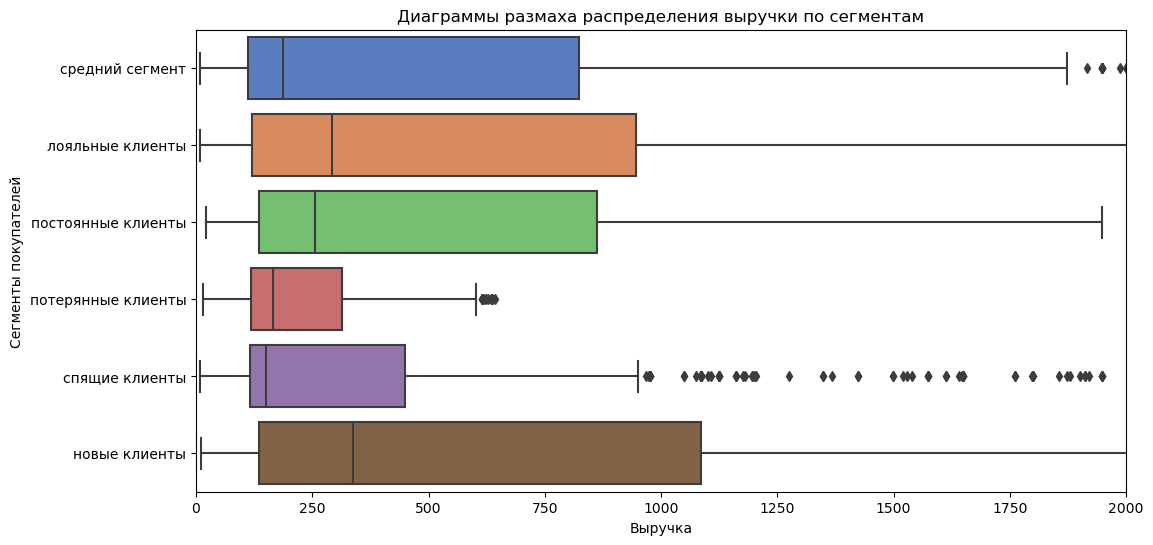

In [74]:
#аналогичный график, укрупненный масштаб
plt.figure(figsize = (12,6))

ax=sns.boxplot(data=df, x='sales', y='segment', palette='muted')

plt.title('Диаграммы размаха распределения выручки по сегментам')
plt.xlabel('Выручка')
plt.ylabel('Сегменты покупателей')
plt.xlim(0, 2000)
plt.show()

Самый высокий размах по выручке, но и по среднему значению - сегмент новых клиентов (350). 
А это значит, что это очень перспективный портрет покупателя.

Также хорошие показатели, которые не так сильно отстают он новых показывают лояльные и постоянные покупатели. 
Как и предполагалось - это 2 наши самые теплые аудитории, которые наиболее лояльны к магазину.

У сегмента потерянных клиентов выручка самая низкая - в среднем 200, а в размахе (75%) не достигает 350. Именно такие клиенты не принесут магазину больших денег и это подтверждает нашу гипотезу о том, что с ними стоит попрощаться как можно раньше и забыть про них.

Чуть лучше, но не сильно ведут себя спящие клиенты - они приносили немного больше выручки в своем диапахоне значений, но вот среднее значение (максимальное для покупателей самое низкое и ниже 200).

Рекомендую сосредоточить свои силы на привлечение 4 сегментов покупателей - лояльные, постоянные, средний сегмент и нашей темной лошадке - новым клиентам! На них сделать прямо акцент и какое-то супер предложение для повторного их взаимодействия с нашим магазином. 
Расстаться с потерянными клиентами и больше не думать о них, на сегмент спящих клиентом делать большую ставку не стала бы.

## 6 Проверка статистических гипотез

### 1. Проверка гипотезы: Средний чек между сегментами n и k различается

H_0: Статистически значимые различия в среднем чеке между сегментами отсутствуют. \
H_1: Есть статистически значимые различия в среднем чеке между сегментами. \
alpha = 0.05

Мы разделили всех покупателей на 6 сегментов. Теперь нам необходимо определить для каждой пары сегментов - \ 
гипотезу отвергаем или не можем отвергнуть ее.

Поскольку в наших данных много выбросов и есть аномальные значения, то лучше использоваться непараметрический тест, 
не проверяя выборки на их нормальность.

Поэтому будем использовать тест Манна-Уитни. \
А поскольку тест у нас множественный, то для снижения вероятности ложнопозитивного результат  применим метод Шидака \
для корректировки уровня значимости.

In [75]:
# 1 вариант с циклом

In [76]:
orders = df.groupby(['segment', 'customer_id']).agg({'sales':'sum'}).reset_index()\
                                                                                .rename(columns={'sales':'revenue'})
orders

,segment,customer_id,revenue
0,лояльные клиенты,005ba170-45e8-42de-93f7-192481ae2659,7857.0
1,лояльные клиенты,00c0f92a-121a-4883-a78d-2c7b5fe187de,321.0
2,лояльные клиенты,00cd704a-a65c-4865-b39a-779f1b4f1d1a,213.0
3,лояльные клиенты,00ff5327-0fba-481c-8a07-47a95093a213,1146.5
4,лояльные клиенты,01a53da1-c3ae-47cf-916e-7e345fe2f2bc,2962.0
...,...,...,...
2426,средний сегмент,fc9641ba-8f74-45de-a60a-342d2e0dd7af,152.0
2427,средний сегмент,fd0b9896-da1b-493a-a53d-1c6cf5deccc4,868.0
2428,средний сегмент,fe2c35d8-a51a-45f3-bd85-27490d1d947a,2398.0
2429,средний сегмент,fe565a98-0d1f-43f8-98f1-cd8e43c79438,672.0


In [77]:
import itertools
from statsmodels.stats.multitest import multipletests

In [78]:
#Создадим лист с парами групп, для которых необходимо провести Тест Манна-Уитни
test_pairs_list = list(itertools.combinations([1, 2, 3, 4, 5, 6], 2))
print(test_pairs_list)

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 3), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6), (5, 6)]


In [79]:
sample_1 = df.query('segment == "средний сегмент"')['sales']
sample_2 = df.query('segment == "лояльные клиенты"')['sales']
sample_3 = df.query('segment == "постоянные клиенты"')['sales']
sample_4 = df.query('segment == "потерянные клиенты"')['sales']
sample_5 = df.query('segment == "спящие клиенты"')['sales']
sample_6 = df.query('segment == "новые клиенты"')['sales']

p_data = []
for pair_names in test_pairs_list:
    group1 = pair_names[0]
    group2 = pair_names[1]
    pvals = (st.mannwhitneyu(sample_1, sample_2, alternative='two-sided')[1])
    p_data.append(pvals)
    multitest_result = multipletests(p_data, 0.05, method='sidak')

In [80]:
for pair_names, test_status, corrected_p in zip(test_pairs_list, multitest_result[0], multitest_result[1]):
    print('Пара кластеров', pair_names)
    print('alpha с поправкой Шидака: ', multitest_result[2])
    if test_status:
        print('Отвергаем нулевую гипотезу: значимые различия между сравниваемыми выборками есть.')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, значимые различия между сравниваемыми выборками отсутствуют.') 
    print('p-значение после корректировки: ', corrected_p)  
    
    print()

Пара кластеров (1, 2)
alpha с поправкой Шидака:  0.0034137129465903193
Отвергаем нулевую гипотезу: значимые различия между сравниваемыми выборками есть.
p-значение после корректировки:  0.0002055783203721036

Пара кластеров (1, 3)
alpha с поправкой Шидака:  0.0034137129465903193
Отвергаем нулевую гипотезу: значимые различия между сравниваемыми выборками есть.
p-значение после корректировки:  0.0002055783203721036

Пара кластеров (1, 4)
alpha с поправкой Шидака:  0.0034137129465903193
Отвергаем нулевую гипотезу: значимые различия между сравниваемыми выборками есть.
p-значение после корректировки:  0.0002055783203721036

Пара кластеров (1, 5)
alpha с поправкой Шидака:  0.0034137129465903193
Отвергаем нулевую гипотезу: значимые различия между сравниваемыми выборками есть.
p-значение после корректировки:  0.0002055783203721036

Пара кластеров (1, 6)
alpha с поправкой Шидака:  0.0034137129465903193
Отвергаем нулевую гипотезу: значимые различия между сравниваемыми выборками есть.
p-значение 

In [81]:
#2 вариант, рабочий, без цикла

In [82]:
#сгруппиурем данные для отобрадения среднего чека по каждому пользователю
orders = df.groupby(['segment', 'customer_id']).agg({'sales':'sum', 'order_id': 'nunique'}).reset_index()

orders['revenue'] = orders['sales'] / orders['order_id']

orders

,segment,customer_id,sales,order_id,revenue
0,лояльные клиенты,005ba170-45e8-42de-93f7-192481ae2659,7857.0,2,3928.50
1,лояльные клиенты,00c0f92a-121a-4883-a78d-2c7b5fe187de,321.0,2,160.50
2,лояльные клиенты,00cd704a-a65c-4865-b39a-779f1b4f1d1a,213.0,2,106.50
3,лояльные клиенты,00ff5327-0fba-481c-8a07-47a95093a213,1146.5,2,573.25
4,лояльные клиенты,01a53da1-c3ae-47cf-916e-7e345fe2f2bc,2962.0,2,1481.00
...,...,...,...,...,...
2426,средний сегмент,fc9641ba-8f74-45de-a60a-342d2e0dd7af,152.0,1,152.00
2427,средний сегмент,fd0b9896-da1b-493a-a53d-1c6cf5deccc4,868.0,1,868.00
2428,средний сегмент,fe2c35d8-a51a-45f3-bd85-27490d1d947a,2398.0,1,2398.00
2429,средний сегмент,fe565a98-0d1f-43f8-98f1-cd8e43c79438,672.0,1,672.00


In [83]:
sample_1 = orders.query('segment == "средний сегмент"')['revenue']
sample_2 = orders.query('segment == "лояльные клиенты"')['revenue']
sample_3 = orders.query('segment == "постоянные клиенты"')['revenue']
sample_4 = orders.query('segment == "потерянные клиенты"')['revenue']
sample_5 = orders.query('segment == "спящие клиенты"')['revenue']
sample_6 = orders.query('segment == "новые клиенты"')['revenue']

# results = вызов метода для проверки гипотезы
results_12= st.mannwhitneyu(sample_1, sample_2) 
results_13= st.mannwhitneyu(sample_1, sample_3)
results_14= st.mannwhitneyu(sample_1, sample_4)
results_15= st.mannwhitneyu(sample_1, sample_5)
results_16= st.mannwhitneyu(sample_1, sample_6)

results_23= st.mannwhitneyu(sample_2, sample_3)
results_24= st.mannwhitneyu(sample_2, sample_4)
results_25= st.mannwhitneyu(sample_2, sample_5)
results_26= st.mannwhitneyu(sample_2, sample_6)

results_34= st.mannwhitneyu(sample_3, sample_4)
results_35= st.mannwhitneyu(sample_3, sample_5)
results_36= st.mannwhitneyu(sample_3, sample_6)

results_45= st.mannwhitneyu(sample_4, sample_5)
results_46= st.mannwhitneyu(sample_4, sample_6)
results_56= st.mannwhitneyu(sample_5, sample_6)

alpha = 0.05 # alpha = задаем значение уровня значимости
shidak_alpha = 1 - (1 - alpha)**(1/15)  # произведено 15 сравнений


print('p-значение для сравнения групп 1 и 2: ', results_12.pvalue)
if results_12.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')
    
print('')    
print('p-значение для сравнения групп 1 и 3: ', results_13.pvalue)
if results_13.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')    

print('')    
print('p-значение для сравнения групп 1 и 4: ', results_14.pvalue)
if results_14.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют') 
    
print('')    
print('p-значение для сравнения групп 1 и 5: ', results_15.pvalue)
if results_15.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')
    
print('')    
print('p-значение для сравнения групп 1 и 6: ', results_16.pvalue)
if results_16.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют') 
    
print('')    
print('p-значение для сравнения групп 2 и 3: ', results_23.pvalue)
if results_23.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')
    
print('')    
print('p-значение для сравнения групп 2 и 4: ', results_24.pvalue)
if results_24.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')
    
print('')    
print('p-значение для сравнения групп 2 и 5: ', results_25.pvalue)
if results_25.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')
    
print('')    
print('p-значение для сравнения групп 2 и 6: ', results_26.pvalue)
if results_26.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')
    
print('')    
print('p-значение для сравнения групп 3 и 4: ', results_34.pvalue)
if results_34.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')
    
print('')    
print('p-значение для сравнения групп 3 и 5: ', results_35.pvalue)
if results_35.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')
    
print('')    
print('p-значение для сравнения групп 3 и 6: ', results_36.pvalue)
if results_36.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')
    
print('')    
print('p-значение для сравнения групп 4 и 5: ', results_45.pvalue)
if results_45.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')
    
print('')    
print('p-значение для сравнения групп 4 и 6: ', results_46.pvalue)
if results_46.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')
    
print('')    
print('p-значение для сравнения групп 5 и 6: ', results_56.pvalue)
if results_56.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')
    


p-значение для сравнения групп 1 и 2:  4.610022050356238e-32
Отвергаем нулевую гипотезу: статистич значимые различия есть

p-значение для сравнения групп 1 и 3:  0.02939582112692161
!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют

p-значение для сравнения групп 1 и 4:  7.889471761743745e-85
Отвергаем нулевую гипотезу: статистич значимые различия есть

p-значение для сравнения групп 1 и 5:  0.17755751119981067
!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют

p-значение для сравнения групп 1 и 6:  1.7771658897424511e-12
Отвергаем нулевую гипотезу: статистич значимые различия есть

p-значение для сравнения групп 2 и 3:  0.2152542751088411
!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют

p-значение для сравнения групп 2 и 4:  3.6869918367301454e-34
Отвергаем нулевую гипотезу: статистич значимые различия есть

p-значение для сравнения групп 2 и 5:  1.4999638832877748e-24
Отве

Итак, большинство гипотез о равенстве средних чеков между сегментами отвергнуты. Это означает, что статистически значимые различия между сегментами есть. И вероятность получить такое же среднее значение слишком мала.

Но для 6 сравнений из 15 тестов гипотез показало, что мы не можем отвергнуть эту гипотезу и для них статистич значимые различия отсутствуют. Т.е. вероятность получить одинаковые средние чеки могут быть при том, что нулевая гипотеза верна.

Это сравнения между сегментами:\
1 и 3 (средний сегмент и постоянные клиенты) - 3% \
1 и 5 (средний сегмент и спящие клиенты) - 18% \
2 и 3 (лояльные и постоянные клиенты) - 21% \
2 и 6 (лояльные и новые клиенты) - 85% \
3 и 5 (постоянные и спящие клиенты) - 4,5% \
3 и 6 (постоянные и новые клиенты) - 33%.

Из этого можно заключить, что средний чек у лояльных и новых клиентов близок в равному.
А также аналогичный вывод касается сегментов постояных и новых клиентов.

In [84]:
# 3 вариант с циклом

In [85]:
def test_3 (df, segment_1, segment_2, alpha):
    sample_1 = df[df['segment'] == segment_1]['revenue']
    sample_2 = df[df['segment'] == segment_2]['revenue']
    
    results = st.mannwhitneyu(sample_1, sample_2)
    
    alpha = 0.05 # alpha = задаем значение уровня значимости
    shidak_alpha = 1 - (1 - alpha)**(1/15)  # произведено 15 сравнений


    print(f'p-значение для сравнения групп "{segment_1}" и "{segment_2}": ', results.pvalue)
    if results.pvalue < shidak_alpha:
        print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
    else:
        print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')
    print('')
    
segments = ['средний сегмент', 'лояльные клиенты', 'постоянные клиенты', 'потерянные клиенты', \
            'спящие клиенты', 'новые клиенты']

for i in range(len(segments)):
    for j in range(i+1, len(segments)):
        test_3(orders, segments[i], segments[j], alpha)
        

p-значение для сравнения групп "средний сегмент" и "лояльные клиенты":  4.610022050356238e-32
Отвергаем нулевую гипотезу: статистич значимые различия есть

p-значение для сравнения групп "средний сегмент" и "постоянные клиенты":  0.02939582112692161
!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют

p-значение для сравнения групп "средний сегмент" и "потерянные клиенты":  7.889471761743745e-85
Отвергаем нулевую гипотезу: статистич значимые различия есть

p-значение для сравнения групп "средний сегмент" и "спящие клиенты":  0.17755751119981067
!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют

p-значение для сравнения групп "средний сегмент" и "новые клиенты":  1.7771658897424511e-12
Отвергаем нулевую гипотезу: статистич значимые различия есть

p-значение для сравнения групп "лояльные клиенты" и "постоянные клиенты":  0.2152542751088411
!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отс

### Проверка гипотезы: Сегмент n чаще совершает покупки, чем покупатели из других сегментов

H_0: Частота покупок сегмента n = частота покупок сегмента не равного n \
H_1: Частота покупок сегмента n ≠ частота покупок сегмента не равного n \
alpha = 0.05

В данном случае проведем множественный тест между несколькими выборками. 
Нам необходимо включить метод корректировки уровня значимости, для того, чтобы снизить вероятность ошибки 1 рода.

Будем исполькозать критерий Шидака.
Тестировать будет 6 сравнений:

In [86]:
#отфильтруем только постоянных клиентов и выберем сколько каждый такой покупатель совершал заказов
df.query('segment == "постоянные клиенты"').groupby('customer_id').agg({'order_id': 'nunique'}).head()

,order_id
customer_id,
0184f535-b60a-4914-a982-231e3f615206,5
0adba506-249c-40b5-839d-a59d7a275cd7,3
0d1b15b6-9cf3-4642-8bc3-74c7dee7b40e,3
41117d9d-94f7-4145-a8c9-cb6675ce7674,3
4856a2a7-b9d2-4243-b8d9-a96ec1425bbe,3


In [87]:
sample_1 = df.query('segment == "средний сегмент"').groupby('customer_id').agg({'order_id': 'nunique'})
sample_2 = df.query('segment != "средний сегмент"').groupby('customer_id').agg({'order_id': 'nunique'})

# results = вызов метода для проверки гипотезы

results_1= st.mannwhitneyu(sample_1, sample_2)

alpha = 0.05 # alpha = задаем значение уровня значимости
shidak_alpha = 1 - (1 - alpha)**(1/6)  # произведено 6 сравнений


print('p-значение: ', results_1.pvalue)# вывод значения p-value на экран 
if results_1.pvalue < shidak_alpha:# условный оператор с выводом строки с ответом
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')

p-значение:  [6.38953708e-103]
Отвергаем нулевую гипотезу: статистич значимые различия есть


In [88]:
sample_1 = df.query('segment == "лояльные клиенты"').groupby('customer_id').agg({'order_id': 'nunique'})
sample_2 = df.query('segment != "лояльные клиенты"').groupby('customer_id').agg({'order_id': 'nunique'})

# results = вызов метода для проверки гипотезы

results_2= st.mannwhitneyu(sample_1, sample_2)

alpha = 0.05 # alpha = задаем значение уровня значимости
shidak_alpha = 1 - (1 - alpha)**(1/6)  # произведено 6 сравнений


print('p-значение: ', results_2.pvalue)# вывод значения p-value на экран 
if results_2.pvalue < shidak_alpha:# условный оператор с выводом строки с ответом
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')

p-значение:  [0.]
Отвергаем нулевую гипотезу: статистич значимые различия есть


In [89]:
sample_1 = df.query('segment == "постоянные клиенты"').groupby('customer_id').agg({'order_id': 'nunique'})
sample_2 = df.query('segment != "постоянные клиенты"').groupby('customer_id').agg({'order_id': 'nunique'})

# results = вызов метода для проверки гипотезы

results_3= st.mannwhitneyu(sample_1, sample_2)

alpha = 0.05 # alpha = задаем значение уровня значимости
shidak_alpha = 1 - (1 - alpha)**(1/6)  # произведено 6 сравнений


print('p-значение: ', results_3.pvalue)# вывод значения p-value на экран 
if results_3.pvalue < shidak_alpha:# условный оператор с выводом строки с ответом
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')
    

p-значение:  [1.19550329e-27]
Отвергаем нулевую гипотезу: статистич значимые различия есть


In [90]:
sample_1 = df.query('segment == "средний сегмент"').groupby('customer_id').agg({'order_id': 'nunique'})
sample_2 = df.query('segment == "лояльные клиенты"').groupby('customer_id').agg({'order_id': 'nunique'})
sample_3 = df.query('segment == "постоянные клиенты"').groupby('customer_id').agg({'order_id': 'nunique'})
sample_4 = df.query('segment == "потерянные клиенты"').groupby('customer_id').agg({'order_id': 'nunique'})
sample_5 = df.query('segment == "спящие клиенты"').groupby('customer_id').agg({'order_id': 'nunique'})
sample_6 = df.query('segment == "новые клиенты"').groupby('customer_id').agg({'order_id': 'nunique'})

# results = вызов метода для проверки гипотезы
results_12= st.mannwhitneyu(sample_1, sample_2) 
results_13= st.mannwhitneyu(sample_1, sample_3)
results_14= st.mannwhitneyu(sample_1, sample_4)
results_15= st.mannwhitneyu(sample_1, sample_5)
results_16= st.mannwhitneyu(sample_1, sample_6)

results_23= st.mannwhitneyu(sample_2, sample_3)
results_24= st.mannwhitneyu(sample_2, sample_4)
results_25= st.mannwhitneyu(sample_2, sample_5)
results_26= st.mannwhitneyu(sample_2, sample_6)

results_34= st.mannwhitneyu(sample_3, sample_4)
results_35= st.mannwhitneyu(sample_3, sample_5)
results_36= st.mannwhitneyu(sample_3, sample_6)

results_45= st.mannwhitneyu(sample_4, sample_5)
results_46= st.mannwhitneyu(sample_4, sample_6)
results_56= st.mannwhitneyu(sample_5, sample_6)

alpha = 0.05 # alpha = задаем значение уровня значимости
shidak_alpha = 1 - (1 - alpha)**(1/15)  # произведено 15 сравнений


print('p-значение для сравнения групп 1 и 2: ', results_12.pvalue)
if results_12.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')
    
print('')    
print('p-значение для сравнения групп 1 и 3: ', results_13.pvalue)
if results_13.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')    

print('')    
print('p-значение для сравнения групп 1 и 4: ', results_14.pvalue)
if results_14.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют') 
    
print('')    
print('p-значение для сравнения групп 1 и 5: ', results_15.pvalue)
if results_15.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')
    
print('')    
print('p-значение для сравнения групп 1 и 6: ', results_16.pvalue)
if results_16.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют') 
    
print('')    
print('p-значение для сравнения групп 2 и 3: ', results_23.pvalue)
if results_23.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')
    
print('')    
print('p-значение для сравнения групп 2 и 4: ', results_24.pvalue)
if results_24.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')
    
print('')    
print('p-значение для сравнения групп 2 и 5: ', results_25.pvalue)
if results_25.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')
    
print('')    
print('p-значение для сравнения групп 2 и 6: ', results_26.pvalue)
if results_26.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')
    
print('')    
print('p-значение для сравнения групп 3 и 4: ', results_34.pvalue)
if results_34.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')
    
print('')    
print('p-значение для сравнения групп 3 и 5: ', results_35.pvalue)
if results_35.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')
    
print('')    
print('p-значение для сравнения групп 3 и 6: ', results_36.pvalue)
if results_36.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')
    
print('')    
print('p-значение для сравнения групп 4 и 5: ', results_45.pvalue)
if results_45.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')
    
print('')    
print('p-значение для сравнения групп 4 и 6: ', results_46.pvalue)
if results_46.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')
    
print('')    
print('p-значение для сравнения групп 5 и 6: ', results_56.pvalue)
if results_56.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу: статистич значимые различия есть')
else:
    print('!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют')
    

p-значение для сравнения групп 1 и 2:  [0.]
Отвергаем нулевую гипотезу: статистич значимые различия есть

p-значение для сравнения групп 1 и 3:  [1.08142109e-140]
Отвергаем нулевую гипотезу: статистич значимые различия есть

p-значение для сравнения групп 1 и 4:  [1.]
!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют

p-значение для сравнения групп 1 и 5:  [1.]
!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют

p-значение для сравнения групп 1 и 6:  [1.]
!!! Не получилось отвергнуть нулевую гипотезу: статистич значимые различия отсутствуют

p-значение для сравнения групп 2 и 3:  [3.37330772e-194]
Отвергаем нулевую гипотезу: статистич значимые различия есть

p-значение для сравнения групп 2 и 4:  [4.56340382e-272]
Отвергаем нулевую гипотезу: статистич значимые различия есть

p-значение для сравнения групп 2 и 5:  [6.10577398e-258]
Отвергаем нулевую гипотезу: статистич значимые различия есть

p-значение для сравнен

Не получилось отвергнуть гипотезы у следующих пар групп:

1 и 4, 5, 6: средний сегмент с потерянными, спящими и новыми клиентами. Во всех этих случаях стат значимые различия отсетсвуют и частота покупок идентична.

4 и 5, 6; 5 и 6: потерянные клиенты и спящие, новые клиенты, атакже спящие и новые клиенты.
Аналогично у них 100% вероятность одинаковой частоты покупок. Стоит заметить, что для этих категорий клиентов так оно и есть, поскольку мы их и выбирали с учетом частоты (frequency = 1).

Для других пар сревнений гипотеза была отвергнута ввиду малой вероятности данного события. Стат значимость для них имеет место быть.

## Выводы и рекомендации

1. Исходный датафрейм содержит 7474 строк. Все данные полные, пропусков нет. 
Из них мы удалили 25% явных и неявных дубликатов и сильно выбирающиеся значения для более чистого анализа.

2. Средний чек заказа находится в пределах 500 р и таких заказов около 50% от общего количества.
Средний чек не превышает 3000 р для большинства покупателей.

Чаще всего покупатели покупают лишь одну позицию товара в заказе. \
Было бы здорово предложить им какую-то акцию при совершении 2-ого или третьего товара в корзине. \
К примеру, чем больше товаров в корзине, тем выше общая скидка на покупку.

Только 10 покупателей сделали более 30 заказов. В основном количество покупок ограничивается 1 или двумя заказами.
Более 50% покупателей делают 1 заказ, только 25% далают 2 заказа.

Самая большая выручка 350 т.р. была в конце 2018 года ( октябрь-декабрь). Начиная с мая 2019 года выручка падала и не превышала 250 т.р.
В ноябре 2019 года сильная просадка по выручке - всего лишь 50 т.р. 

3.  Самая популярная категория - растения (2325 товаров), на нее приходится больше 40% всего товара.
Второй по популярности идет - хоз товары - 1443 товара, что составляет около 25% от общего количества.

Остальные категории встречаются реже. Товары для дома, кухонные принадлежности покупают редко - процент от общего числа менее 6%.

4. Количество потерянных клиентов - 391. С этой категорией лучше попрощаться и не вспоминать о них. Выручку они приносят хуже всего.
Единственное, что можно сделать для них перед прощанием напомнить о себе - отправить рассылку с каким-то особым предложением вернуться в наш магазин, предоставив скидку на покупку по промокоду "возвращение" и начать копить баллы, которые можно будет использовать при следующих покупках.

5. Постоянных клиентов не много - всего 28 человек.
К ним стоит относится со всей бережливостью и предлагать сотрудничество на особых условиях.

6. Выручка в апреле и мае 2019 только для растений и овоощей\фруктов составляет 50% по сравнению со всеми другими категориями. В эти месяцы выручка была в 2 раза выше (и это самое пиковое знаечение), чем в июне.

Лидирующие категории товаров каждый месяц - растения, хозтовары, прочие.

7. Самое большое количество покупок у лояльного и среднего сегмента в зимний период, а вот осенью продажи у них практически на нуле.\
Лояльные клиенты также довольно хорошо покупают весной.\
Спящие клиенты совершали много покупок летом.\
В целом, самый тяжело идущий сезон - осень для всех сегментов покупателей.


8. Рекомендую сосредоточить свои силы на привлечении 4 сегментов покупателей - лояльные, постоянные, средний сегмент и нашей темной лошадке - новым клиентам! На них сделать прямо акцент и какое-то супер предложение для повторного их взаимодействия с нашим магазином. 
Расстаться с потерянными клиентами и больше не думать о них, на сегмент спящих клиентом делать большую ставку не стала бы.



<b>Рекомендации:</b>

<b>- Лояльные клиенты:</b>\
Это самая большая категория покупателей (857 человек), которая может очень сильно увеличить выручку магазина. Поэтому на них стоит обратить особое внимание.

К этой категории относятся покупатели, которые совершали более 1 заказа (2 заказа), т.е. они приходили в наш магазин повторно.
Они совершают наибольшее количество покупок по сравнению с другими сегментами. 
Основные категории товаров - больше всего товаров для дома. Растения также покупают хорошо, но все же в меньшей степени. В покупках много хозтоваров и кух. принадлежностей. Т.е. это люди все же склонные приобретать что-то для дома, а не для огорода.

Наибольшее кол-во покупок у этого сегмента зимой! Как раз, когда в огороде ничего не сажают.
Хотя вечной они также хорошо приобретают товары.

Поэтому предлагаю для них формировать предложения, основанные на повторном приходе в магазин. 
Средний чек заказа для них не столь велик и его стоит повышать.
ПОэтому стоит также предлагать в рассылках сопутствующие товары, на основании товаров в их корзине. Чтобы они могли разнообразить свои покупки еще большим количеством товаров в заказе, а также чтобы число заказов на каждого покупателя увелиивалось.


<b>- Постоянные клиенты:</b> \
Постоянных клиентов не много - это самый малый сегмент их кластеризации, всего 28 покупателей. Но не менее ценных для бизнеса!
Этот сегмент покупателей, у которых заказов больше 2, т.е. от 3 и выше.
У них не такое больше количество покупок по сравнению с другими сегментами, но это следствие малости самого сегмента. 
Чаще всегоони покупают растения и хозтовары.

Средний чек у них остаточно высок - на уровне 1300 р. Но для увеличения выручки конечно же можно стремиться его повышать.
Осенью у них практически нет покупок. Больше заказов в зимний период.

Для этого сегмента рекомендую предложить особый подход и особые условия сотрудничества (карта постоянного клиента, карта лояльности, партнерские условия).


<b>- Потерянные клиенты:</b> \
Это категория клиентов, которая заказывала в нашем интернет-магазине только 1 раз, давно и на невысокий чек (таких покупателей 386). \
Они заказывали больше растения, весной. Зимой также были покупки. Осень вообще не было продаж.\
Средний чек и у них самый низкий - всего 320 р, поэтому и выручку они особо не принесли.

С категорией потерянных клиентов считаю, что стоит расстаться и не тратить на них много времени. Можно лишь им вдогонку выслать 1 рассылку, которая напомнит о нас и может стимулировать их к повторной покупке. Если нет, то нет.


<b>- Спящие клиенты:</b> \
Спящих клиентов по количеству почти столько же сколько и потерянных - 366. Они также довольно давно были у нас ( окло года назад), но выручка от них была выше, нежели от потерянных клиентов.

Покупили они намного в большинтве случае растения, весной и чуть меньше летом. \
А вот средний чек у них был высокий - 1750 р.

Поэтому таких  клиентов надо раскачивать, они давно у нас ничего не покупали, и им нужно напомнить о себе. 
Рассказать о новинках в интернет-магазине, которые произошли у нас за последний год.


<b>- Новые клиенты:</b> \
К новым клиентам относятся покупатели, которые недавно совершали оплату и успели сделать лишь 1 заказ.\ 
У них пока малое количество покупок, в товарах у них растения и хозтовары в соотношении 50\50.\
Это покупатели с осени прошлого года. Зимой они также хорошо покупали товары.\
Средний чек у них не столь высок - 1000 р. \
У этого сегмента самый высокий размах по выручке, и по среднему значению (350). А это значит, что это очень перспективный портрет покупателя.

Новым клиентам также надо рассказывать о наших новинках, в принципе о нашем продукте, чем он уникален и чем отличается от конкурентов. Предлагать "подарок" за следующую покупку, также для того чтобы стимулировать их к нам вернуться и желание остаться с нами.

Также новым клиентам стоит увеличивать количество товаров в заказе, для того чтобы средний чек увеличивался (показывать сопутствующие товары).


<b>- Средний сегмент:</b> \
Покупатели, которые не попали ни с один из предыдущих сегментов стали средним сегментом. 
Среднего сегмента тоже довольно много (611 покупателей), они не приносили супер прибыли для нас. 
Покупки распределены в течение года, все сезоны активны кроме осени - здесь очень мало продаж было.

На их долю выпадает почти 1500 покупок - достаточное количество. Чаще они покупают растения, и в 2 раза меньше хозтоваров.

У этого сегмента самый высокий средний чек заказа - 1800 р. И второе по популярности после лояльных клиентов общее кол-во заказов (600 штук).

Поэтому в случае с этой категорией, думаю будет целесообразно рассказать о скидках или баллах за доп. товары в заказе. Им нужно "продавать идею" купить больше товаров в заказе или чтобы сумма заказа были не ниже определенной границы (стимурирование к определнной сумме покупки).

In [91]:
df.to_csv(r'D:\Аналитик данных\final.csv', index=False)

## Презентация проекта

Ссылка на гугл-диске https://drive.google.com/file/d/1RoC45V6mfvyn2EL8GlnM8XuRy-5aN1d9/view?usp=share_link

## Дашборд проекта

Ссылка на дашборд https://public.tableau.com/views/ecom_1/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link